In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Company(FRA).csv')

In [3]:
df.head()

Num  Networth Next Year  Total assets  Net worth  Total income  \
0    1               395.3         827.6      336.5         534.1   
1    2                36.2          67.7       24.3         137.9   
2    3                84.0         238.4       78.9         331.2   
3    4              2041.4        6883.5     1443.3        8448.5   
4    5                41.8          90.9       47.0         388.6   

   Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
0             13.5           508.7              38.9   124.4   64.6  ...   
1             -3.7           131.0               3.2     5.5    1.0  ...   
2            -18.1           309.2               3.9    25.8   10.5  ...   
3            212.2          8482.4             178.3   418.4  185.1  ...   
4              3.4           392.7              -0.7     7.2   -0.6  ...   

   Debtors turnover  Finished goods turnover  WIP turnover  \
0              5.65                     3.99          3.37   
1               NaN                      NaN           NaN   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw material turnover  Shares outstanding  Equity face value    EPS  \
0                  14.87           8760056.0               10.0   4.44   
1                    NaN                 NaN                NaN   0.00   
2                   8.35                 NaN                NaN   0.00   
3                  11.11          10000000.0               10.0  17.60   
4                  19.93            107315.0              100.0  -6.52   

   Adjusted EPS  Total liabilities  PE on BSE  
0          4.44              827.6        NaN  
1          0.00               67.7        NaN  
2          0.00              238.4        NaN  
3         17.60             6883.5        NaN  
4         -6.52               90.9        NaN  

[5 rows x 51 columns]

In [4]:
df.shape

(4256, 51)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

In [6]:
df.columns = df.columns.str.replace('as % of', 'to')
df.columns = df.columns.str.replace('/', 'to')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Num                                           4256 non-null   int64  
 1   Networth Next Year                            4256 non-null   float64
 2   Total assets                                  4256 non-null   float64
 3   Net worth                                     4256 non-null   float64
 4   Total income                                  4025 non-null   float64
 5   Change in stock                               3706 non-null   float64
 6   Total expenses                                4091 non-null   float64
 7   Profit after tax                              4102 non-null   float64
 8   PBDITA                                        4102 non-null   float64
 9   PBT                                           4102 non-null   f

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Num, Networth Next Year, Total assets, Net worth, Total income, Change in stock, Total expenses, Profit after tax, PBDITA, PBT, Cash profit, PBDITA to total income, PBT to total income, PAT to total income, Cash profit to total income, PAT to net worth, Sales, Income from fincial services, Other income, Total capital, Reserves and funds, Borrowings, Current liabilities & provisions, Deferred tax liability, Shareholders funds, Cumulative retained profits, Capital employed, TOLtoTNW, Total term liabilities to tangible net worth, Contingent liabilities to Net worth (%), Contingent liabilities, Net fixed assets, Investments, Current assets, Net working capital, Quick ratio (times), Current ratio (times), Debt to equity ratio (times), Cash to current liabilities (times), Cash to average cost of sales per day, Creditors turnover, Debtors turnover, Finished goods turnover, WIP turnover, Raw material turnover, Shares outstanding, Equity face value, EPS, Adjusted EPS, Total liabilities, PE on BSE]
Index: []

[0 rows x 51 columns]

In [9]:
df.drop(['Num'],axis=1,inplace=True)

In [10]:
df.describe().T.round(2)

count         mean  \
Networth Next Year                            4256.0      1344.74   
Total assets                                  4256.0      3573.62   
Net worth                                     4256.0      1351.95   
Total income                                  4025.0      4688.19   
Change in stock                               3706.0        43.70   
Total expenses                                4091.0      4356.30   
Profit after tax                              4102.0       295.05   
PBDITA                                        4102.0       605.94   
PBT                                           4102.0       410.26   
Cash profit                                   4102.0       408.27   
PBDITA to total income                        4177.0         3.18   
PBT to total income                           4177.0       -18.20   
PAT to total income                           4177.0       -20.03   
Cash profit to total income                   4177.0        -9.02   
PAT to net worth                              4256.0        10.17   
Sales                                         3951.0      4645.68   
Income from fincial services                  3145.0        81.36   
Other income                                  2700.0        55.95   
Total capital                                 4251.0       224.56   
Reserves and funds                            4158.0      1210.56   
Borrowings                                    3825.0      1176.25   
Current liabilities & provisions              4146.0       960.63   
Deferred tax liability                        2887.0       234.50   
Shareholders funds                            4256.0      1376.49   
Cumulative retained profits                   4211.0       937.18   
Capital employed                              4256.0      2433.62   
TOLtoTNW                                      4256.0         4.03   
Total term liabilities to tangible net worth  4256.0         1.85   
Contingent liabilities to Net worth (%)       4256.0        55.71   
Contingent liabilities                        2854.0       948.55   
Net fixed assets                              4124.0      1209.49   
Investments                                   2541.0       721.87   
Current assets                                4176.0      1350.36   
Net working capital                           4219.0       162.87   
Quick ratio (times)                           4151.0         1.50   
Current ratio (times)                         4151.0         2.26   
Debt to equity ratio (times)                  4256.0         2.87   
Cash to current liabilities (times)           4151.0         0.53   
Cash to average cost of sales per day         4156.0       145.16   
Creditors turnover                            3865.0        16.81   
Debtors turnover                              3871.0        17.93   
Finished goods turnover                       3382.0        84.37   
WIP turnover                                  3492.0        28.68   
Raw material turnover                         3828.0        17.73   
Shares outstanding                            3446.0  23764909.56   
Equity face value                             3446.0     -1094.83   
EPS                                           4256.0      -196.22   
Adjusted EPS                                  4256.0      -197.53   
Total liabilities                             4256.0      3573.62   
PE on BSE                                     1629.0        55.46   

                                                       std           min  \
Networth Next Year                            1.593674e+04 -7.426560e+04   
Total assets                                  3.007444e+04  1.000000e-01   
Net worth                                     1.296131e+04  0.000000e+00   
Total income                                  5.391895e+04  0.000000e+00   
Change in stock                               4.369200e+02 -3.029400e+03   
Total expenses                                5.139809e+04 -1.000000e-0

In [11]:
df['Default'] = '1'

df.loc[df['Networth Next Year'] > 0, 'Default'] = '0'

In [12]:
df['Default'].value_counts()

0    3352
1     904
Name: Default, dtype: int64

In [13]:
df['Default'] = df['Default'].astype(float)

In [14]:
df.Default.sum()/len(df.Default)

0.212406015037594

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Networth Next Year                            4256 non-null   float64
 1   Total assets                                  4256 non-null   float64
 2   Net worth                                     4256 non-null   float64
 3   Total income                                  4025 non-null   float64
 4   Change in stock                               3706 non-null   float64
 5   Total expenses                                4091 non-null   float64
 6   Profit after tax                              4102 non-null   float64
 7   PBDITA                                        4102 non-null   float64
 8   PBT                                           4102 non-null   float64
 9   Cash profit                                   4102 non-null   f

In [16]:
df.isnull().sum()

Networth Next Year                                 0
Total assets                                       0
Net worth                                          0
Total income                                     231
Change in stock                                  550
Total expenses                                   165
Profit after tax                                 154
PBDITA                                           154
PBT                                              154
Cash profit                                      154
PBDITA to total income                            79
PBT to total income                               79
PAT to total income                               79
Cash profit to total income                       79
PAT to net worth                                   0
Sales                                            305
Income from fincial services                    1111
Other income                                    1556
Total capital                                 

In [17]:
from sklearn.impute import KNNImputer

In [18]:
imputer = KNNImputer(n_neighbors=5)

In [19]:
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [20]:
df_imputed.isnull().sum()

Networth Next Year                              0
Total assets                                    0
Net worth                                       0
Total income                                    0
Change in stock                                 0
Total expenses                                  0
Profit after tax                                0
PBDITA                                          0
PBT                                             0
Cash profit                                     0
PBDITA to total income                          0
PBT to total income                             0
PAT to total income                             0
Cash profit to total income                     0
PAT to net worth                                0
Sales                                           0
Income from fincial services                    0
Other income                                    0
Total capital                                   0
Reserves and funds                              0


In [21]:
df_imputed.describe().round(2)

Networth Next Year  Total assets  Net worth  Total income  \
count             4256.00       4256.00    4256.00       4256.00   
mean              1344.74       3573.62    1351.95       4442.48   
std              15936.74      30074.44   12961.31      52445.12   
min             -74265.60          0.10       0.00          0.00   
25%                  3.98         91.30      31.48         85.12   
50%                 72.10        315.50     104.80        392.65   
75%                330.82       1120.80     389.85       1405.80   
max             805773.40    1176509.20  613151.60    2442828.20   

       Change in stock  Total expenses  Profit after tax     PBDITA  \
count          4256.00         4256.00           4256.00    4256.00   
mean             38.42         4194.28            284.55     584.88   
std             407.98        50398.25           3024.15    5544.21   
min           -3029.40           -0.10          -3908.30    -440.70   
25%              -1.00           81.45              0.30       5.70   
50%               0.83          384.50              8.00      33.40   
75%              14.50         1339.68             51.22     149.52   
max           14185.50      2366035.30         119439.10  208576.50   

             PBT  Cash profit  ...  Finished goods turnover  WIP turnover  \
count    4256.00      4256.00  ...                  4256.00       4256.00   
mean      395.65       393.99  ...                    80.40         28.64   
std      4141.09      4068.93  ...                   505.35        156.19   
min     -3894.80     -2245.70  ...                    -0.09         -0.18   
25%         0.50         2.38  ...                     8.78          5.27   
50%        10.85        17.60  ...                    18.42         10.44   
75%        70.53        91.60  ...                    42.94         21.11   
max    145292.60    176911.80  ...                 17947.60       5651.40   

       Raw material turnover  Shares outstanding  Equity face value  \
count                4256.00        4.256000e+03            4256.00   
mean                   21.04        1.919833e+07           -1353.57   
std                   350.24        1.556301e+08           32166.21   
min                    -2.00       -2.147484e+09         -999998.90   
25%                     2.99        1.076450e+06              10.00   
50%                     6.46        4.038595e+06              10.00   
75%                    11.82        9.707338e+06              10.00   
max                 21092.00        4.130401e+09          100000.00   

             EPS  Adjusted EPS  Total liabilities  PE on BSE  Default  
count    4256.00       4256.00            4256.00    4256.00  4256.00  
mean     -196.22       -197.53            3573.62    4293.64     0.21  
std     13061.95      13061.93           30074.44    5082.63     0.41  
min   -843181.82    -843181.82               0.10   -1116.64     0.00  
25%         0.00          0.00              91.30       7.26     0.00  
50%         1.49          1.24             315.50      33.75     0.00  
75%        10.00          7.62            1120.80   10204.24     0.00  
max     34522.53      34522.53         1176509.20   51002.74     1.00  

[8 rows x 51 columns]

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [23]:
imputer = IterativeImputer()

In [24]:
df_mul_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [25]:
df_mul_imputed.describe().T.round(2)

count         mean  \
Networth Next Year                            4256.0      1344.74   
Total assets                                  4256.0      3573.62   
Net worth                                     4256.0      1351.95   
Total income                                  4256.0      4597.66   
Change in stock                               4256.0        41.31   
Total expenses                                4256.0      4346.20   
Profit after tax                              4256.0       292.96   
PBDITA                                        4256.0       600.62   
PBT                                           4256.0       409.82   
Cash profit                                   4256.0       403.05   
PBDITA to total income                        4256.0         8.85   
PBT to total income                           4256.0       -17.86   
PAT to total income                           4256.0       -19.77   
Cash profit to total income                   4256.0        -8.53   
PAT to net worth                              4256.0        10.17   
Sales                                         4256.0      4475.25   
Income from fincial services                  4256.0        52.77   
Other income                                  4256.0        41.65   
Total capital                                 4256.0       223.07   
Reserves and funds                            4256.0      1176.03   
Borrowings                                    4256.0      1001.23   
Current liabilities & provisions              4256.0       938.03   
Deferred tax liability                        4256.0       176.09   
Shareholders funds                            4256.0      1376.49   
Cumulative retained profits                   4256.0       929.84   
Capital employed                              4256.0      2433.62   
TOLtoTNW                                      4256.0         4.03   
Total term liabilities to tangible net worth  4256.0         1.85   
Contingent liabilities to Net worth (%)       4256.0        55.71   
Contingent liabilities                        4256.0       579.18   
Net fixed assets                              4256.0      1171.88   
Investments                                   4256.0       417.23   
Current assets                                4256.0      1329.44   
Net working capital                           4256.0       161.70   
Quick ratio (times)                           4256.0         1.50   
Current ratio (times)                         4256.0         2.26   
Debt to equity ratio (times)                  4256.0         2.87   
Cash to current liabilities (times)           4256.0         0.53   
Cash to average cost of sales per day         4256.0       156.05   
Creditors turnover                            4256.0        16.83   
Debtors turnover                              4256.0        17.93   
Finished goods turnover                       4256.0        84.60   
WIP turnover                                  4256.0        28.44   
Raw material turnover                         4256.0        17.78   
Shares outstanding                            4256.0  20961761.44   
Equity face value                             4256.0     -1133.94   
EPS                                           4256.0      -196.22   
Adjusted EPS                                  4256.0      -197.53   
Total liabilities                             4256.0      3573.62   
PE on BSE                                     4256.0      6065.99   
Default                                       4256.0         0.21   

                                                       std           min  \
Networth Next Year                            1.593674e+04 -7.426560e+04   
Total assets                                  3.007444e+04  1.000000e-01   
Net worth                                     1.296131e+04  0.000000e+00   
Total income                                  5.243853e+04 -2.357290e+03   
Change in stock                               4.086800e+02 -3.029400e+03   
To

In [26]:
df_mul_imputed.to_excel('Imputed_Sales.xlsx',index=False)

In [27]:
df_mul_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Networth Next Year                            4256 non-null   float64
 1   Total assets                                  4256 non-null   float64
 2   Net worth                                     4256 non-null   float64
 3   Total income                                  4256 non-null   float64
 4   Change in stock                               4256 non-null   float64
 5   Total expenses                                4256 non-null   float64
 6   Profit after tax                              4256 non-null   float64
 7   PBDITA                                        4256 non-null   float64
 8   PBT                                           4256 non-null   float64
 9   Cash profit                                   4256 non-null   f

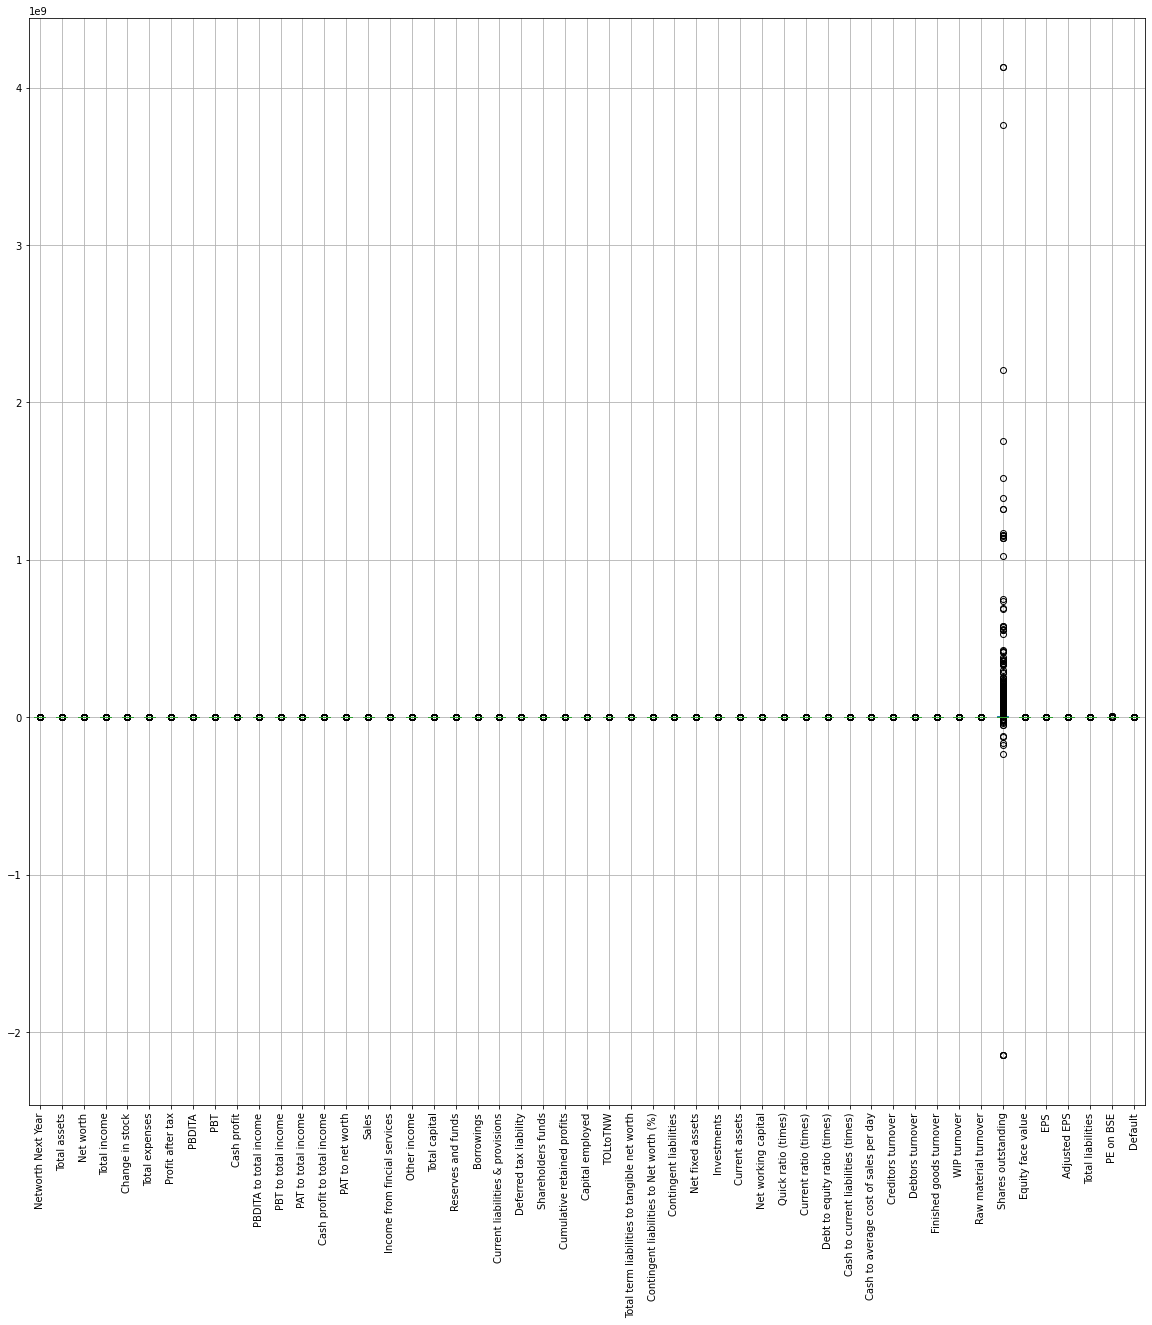

In [28]:
plt.figure(figsize = (20,20))
df_mul_imputed.boxplot()
plt.xticks(rotation='vertical');

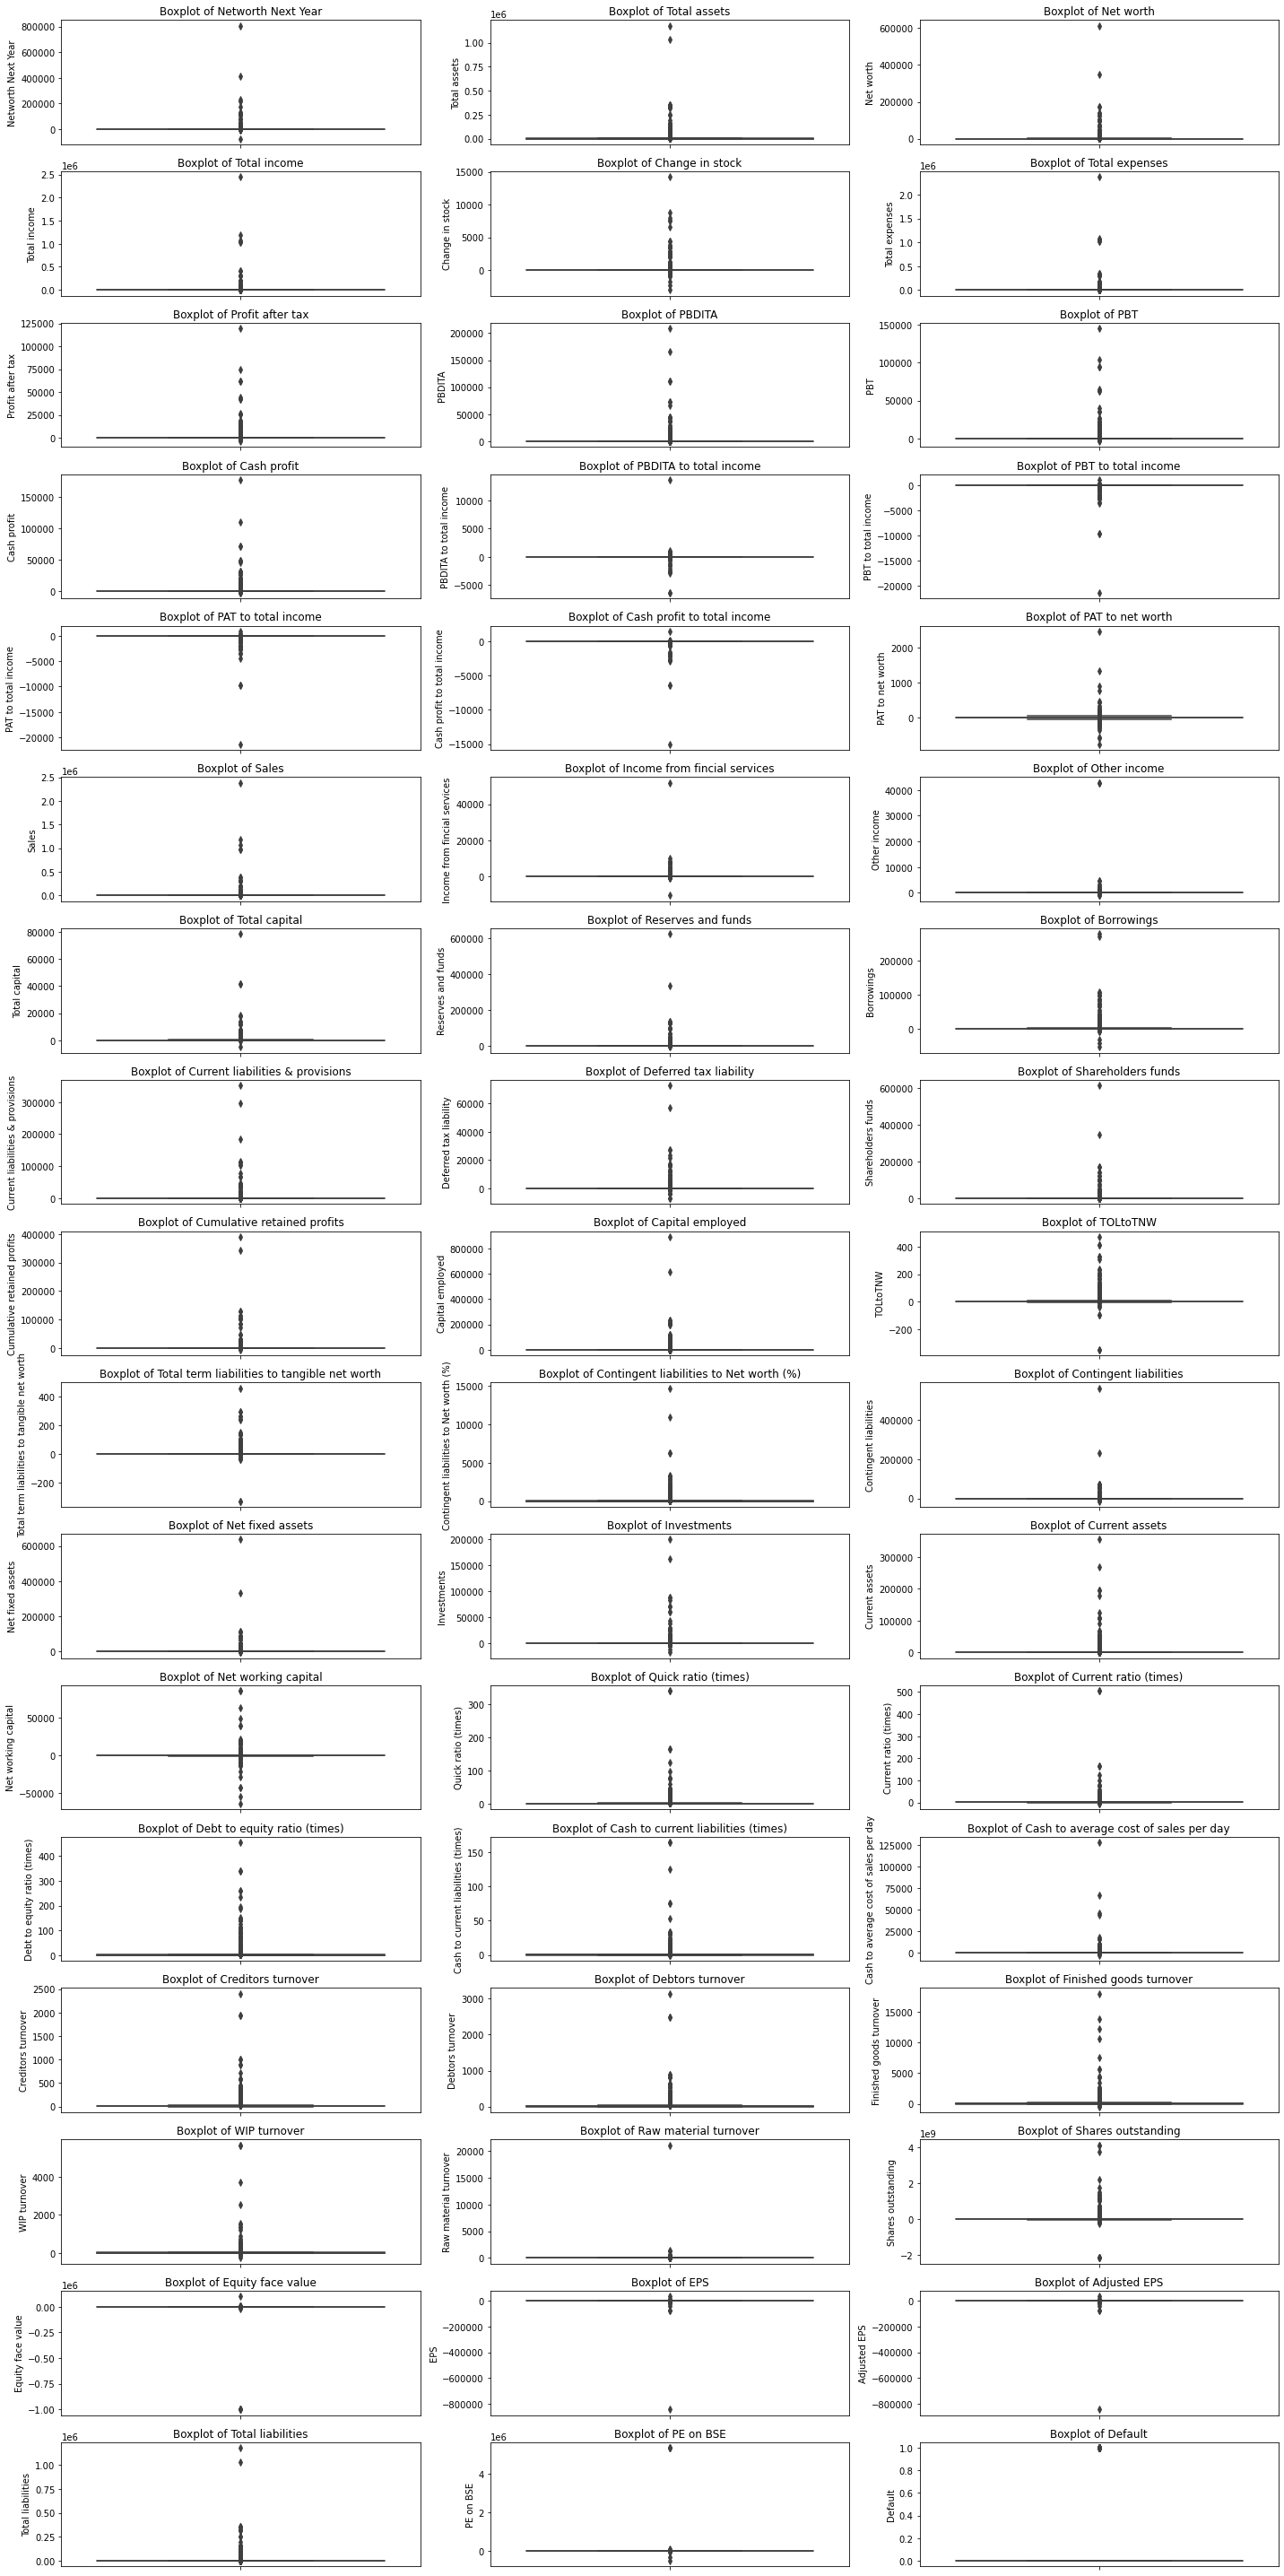

In [29]:
plt.figure(figsize = (20,40))
feature_list = df_mul_imputed.columns
for i in range(len(feature_list)):
    plt.subplot(17,3, i + 1)
    sns.boxplot(y = df_mul_imputed[feature_list[i]], data = df_mul_imputed)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [30]:
df=df_mul_imputed

In [31]:
outlier_counts = {}

for column in df.select_dtypes(include='number'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    outliers = ((df[column] < (Q1 - threshold * IQR)) | (df[column] > (Q3 + threshold * IQR)))
    outlier_counts[column] = outliers.sum()
sorted_columns = sorted(outlier_counts, key=lambda x: outlier_counts[x], reverse=True)
for column in sorted_columns:
    print(f"Column '{column}': {outlier_counts[column]} outliers")

Column 'Income from fincial services': 1520 outliers
Column 'Equity face value': 1343 outliers
Column 'PE on BSE': 1297 outliers
Column 'Investments': 1084 outliers
Column 'Default': 904 outliers
Column 'Other income': 870 outliers
Column 'Borrowings': 851 outliers
Column 'Net working capital': 812 outliers
Column 'Change in stock': 807 outliers
Column 'Profit after tax': 768 outliers
Column 'PBT': 763 outliers
Column 'Contingent liabilities': 732 outliers
Column 'Reserves and funds': 696 outliers
Column 'Adjusted EPS': 694 outliers
Column 'Cumulative retained profits': 691 outliers
Column 'PAT to total income': 683 outliers
Column 'Deferred tax liability': 656 outliers
Column 'EPS': 638 outliers
Column 'Cash to average cost of sales per day': 634 outliers
Column 'Networth Next Year': 624 outliers
Column 'Total income': 602 outliers
Column 'Sales': 602 outliers
Column 'Net fixed assets': 601 outliers
Column 'Net worth': 595 outliers
Column 'Total expenses': 594 outliers
Column 'PBT to 

In [32]:
df_X = df.drop('Default', axis = 1)
df_Y = df['Default']

In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [34]:
for column in df_X.columns:
    lr,ur=remove_outlier(df[column])
    df_X[column]=np.where(df_X[column]>ur,ur,df_X[column])
    df_X[column]=np.where(df_X[column]<lr,lr,df_X[column])

In [35]:
df = pd.concat([df_X, df_Y], axis = 1)

In [36]:
outlier_counts = {}
for column in df.select_dtypes(include='number'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    outliers = ((df[column] < (Q1 - threshold * IQR)) | (df[column] > (Q3 + threshold * IQR)))
    outlier_counts[column] = outliers.sum()
sorted_columns = sorted(outlier_counts, key=lambda x: outlier_counts[x], reverse=True)
for column in sorted_columns:
    print(f"Column '{column}': {outlier_counts[column]} outliers")

Column 'Default': 904 outliers
Column 'Networth Next Year': 0 outliers
Column 'Total assets': 0 outliers
Column 'Net worth': 0 outliers
Column 'Total income': 0 outliers
Column 'Change in stock': 0 outliers
Column 'Total expenses': 0 outliers
Column 'Profit after tax': 0 outliers
Column 'PBDITA': 0 outliers
Column 'PBT': 0 outliers
Column 'Cash profit': 0 outliers
Column 'PBDITA to total income': 0 outliers
Column 'PBT to total income': 0 outliers
Column 'PAT to total income': 0 outliers
Column 'Cash profit to total income': 0 outliers
Column 'PAT to net worth': 0 outliers
Column 'Sales': 0 outliers
Column 'Income from fincial services': 0 outliers
Column 'Other income': 0 outliers
Column 'Total capital': 0 outliers
Column 'Reserves and funds': 0 outliers
Column 'Borrowings': 0 outliers
Column 'Current liabilities & provisions': 0 outliers
Column 'Deferred tax liability': 0 outliers
Column 'Shareholders funds': 0 outliers
Column 'Cumulative retained profits': 0 outliers
Column 'Capital

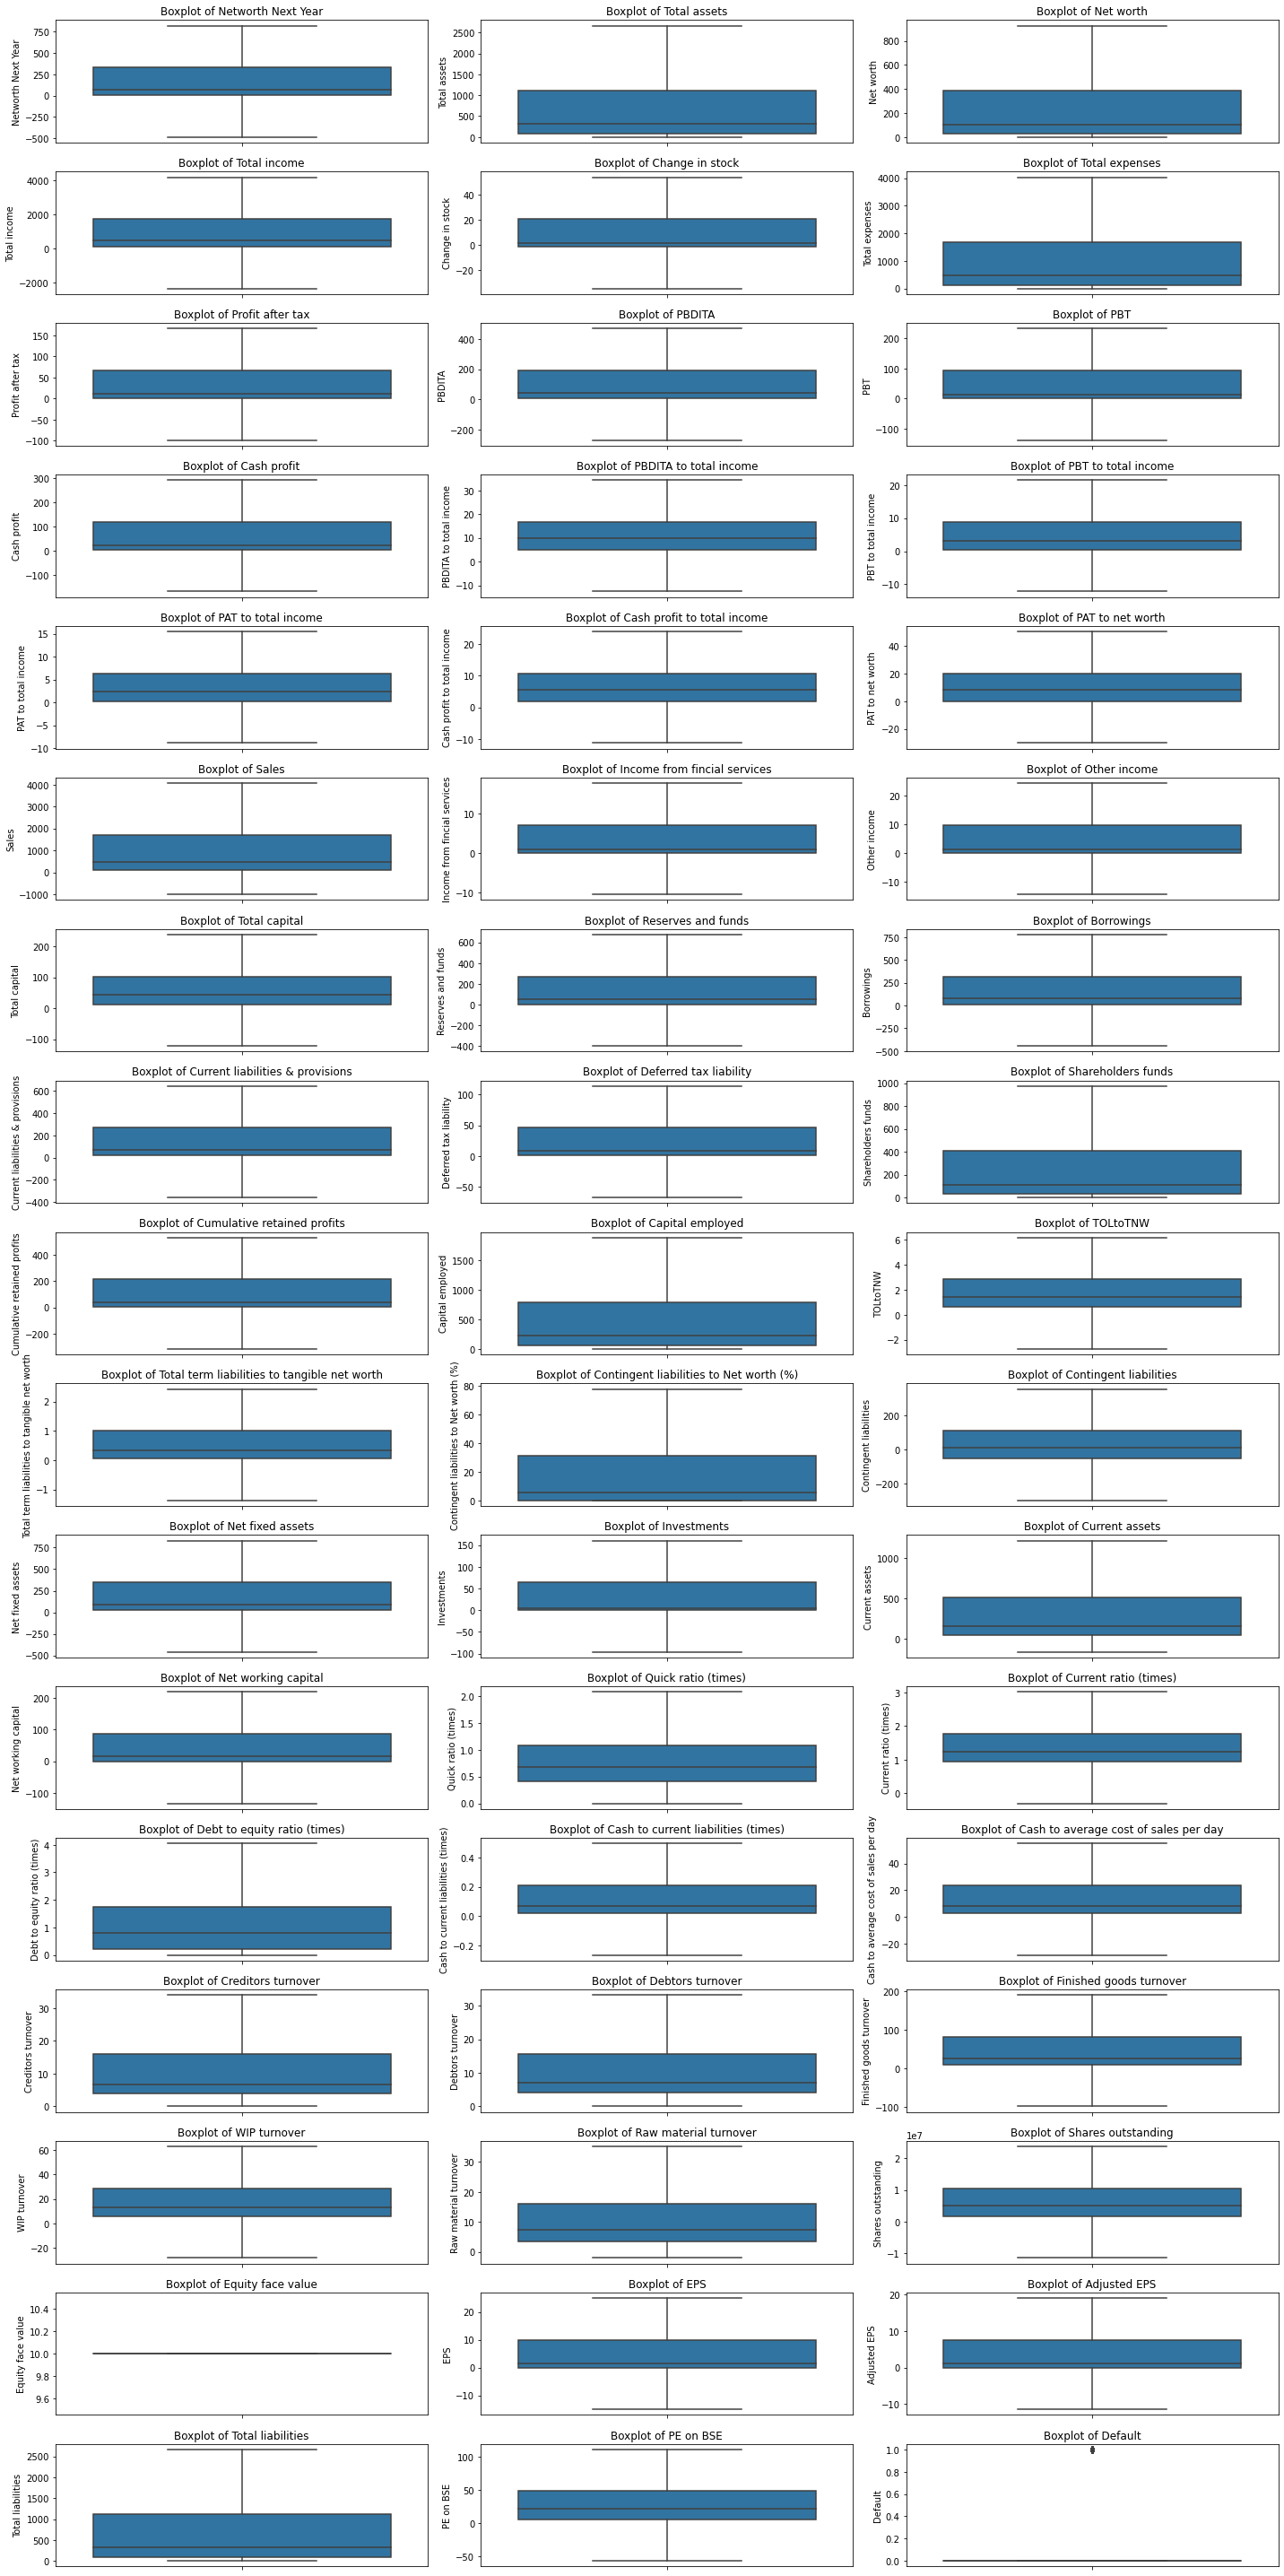

In [37]:
plt.figure(figsize = (20,40))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(17,3, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [38]:
df.head()

Networth Next Year  Total assets  Net worth  Total income  Change in stock  \
0               395.3        827.60   336.5000      534.1000        13.500000   
1                36.2         67.70    24.3000      137.9000        -3.700000   
2                84.0        238.40    78.9000      331.2000       -18.100000   
3               821.1       2665.05   927.4125     4188.0875        53.974578   
4                41.8         90.90    47.0000      388.6000         3.400000   

   Total expenses  Profit after tax  PBDITA    PBT  Cash profit  ...  \
0         508.700            38.900   124.4   64.6         95.2  ...   
1         131.000             3.200     5.5    1.0          3.8  ...   
2         309.200             3.900    25.8   10.5          9.4  ...   
3        4035.625           165.725   418.4  185.1        178.0  ...   
4         392.700            -0.700     7.2   -0.6          3.9  ...   

   Finished goods turnover  WIP turnover  Raw material turnover  \
0                 3.990000      3.370000              14.870000   
1                86.374236     29.399913              18.441638   
2                17.670000      8.760000               8.350000   
3                18.140000     18.620000              11.110000   
4                45.870000     28.670000              19.930000   

   Shares outstanding  Equity face value    EPS  Adjusted EPS  \
0        8.760056e+06               10.0   4.44          4.44   
1        2.706371e+06               10.0   0.00          0.00   
2        2.130163e+06               10.0   0.00          0.00   
3        1.000000e+07               10.0  17.60         17.60   
4        1.073150e+05               10.0  -6.52         -6.52   

   Total liabilities   PE on BSE  Default  
0             827.60   34.161415      0.0  
1              67.70  111.254721      0.0  
2             238.40  111.254721      0.0  
3            2665.05   21.215735      0.0  
4              90.90  -56.800832      0.0  

[5 rows x 51 columns]

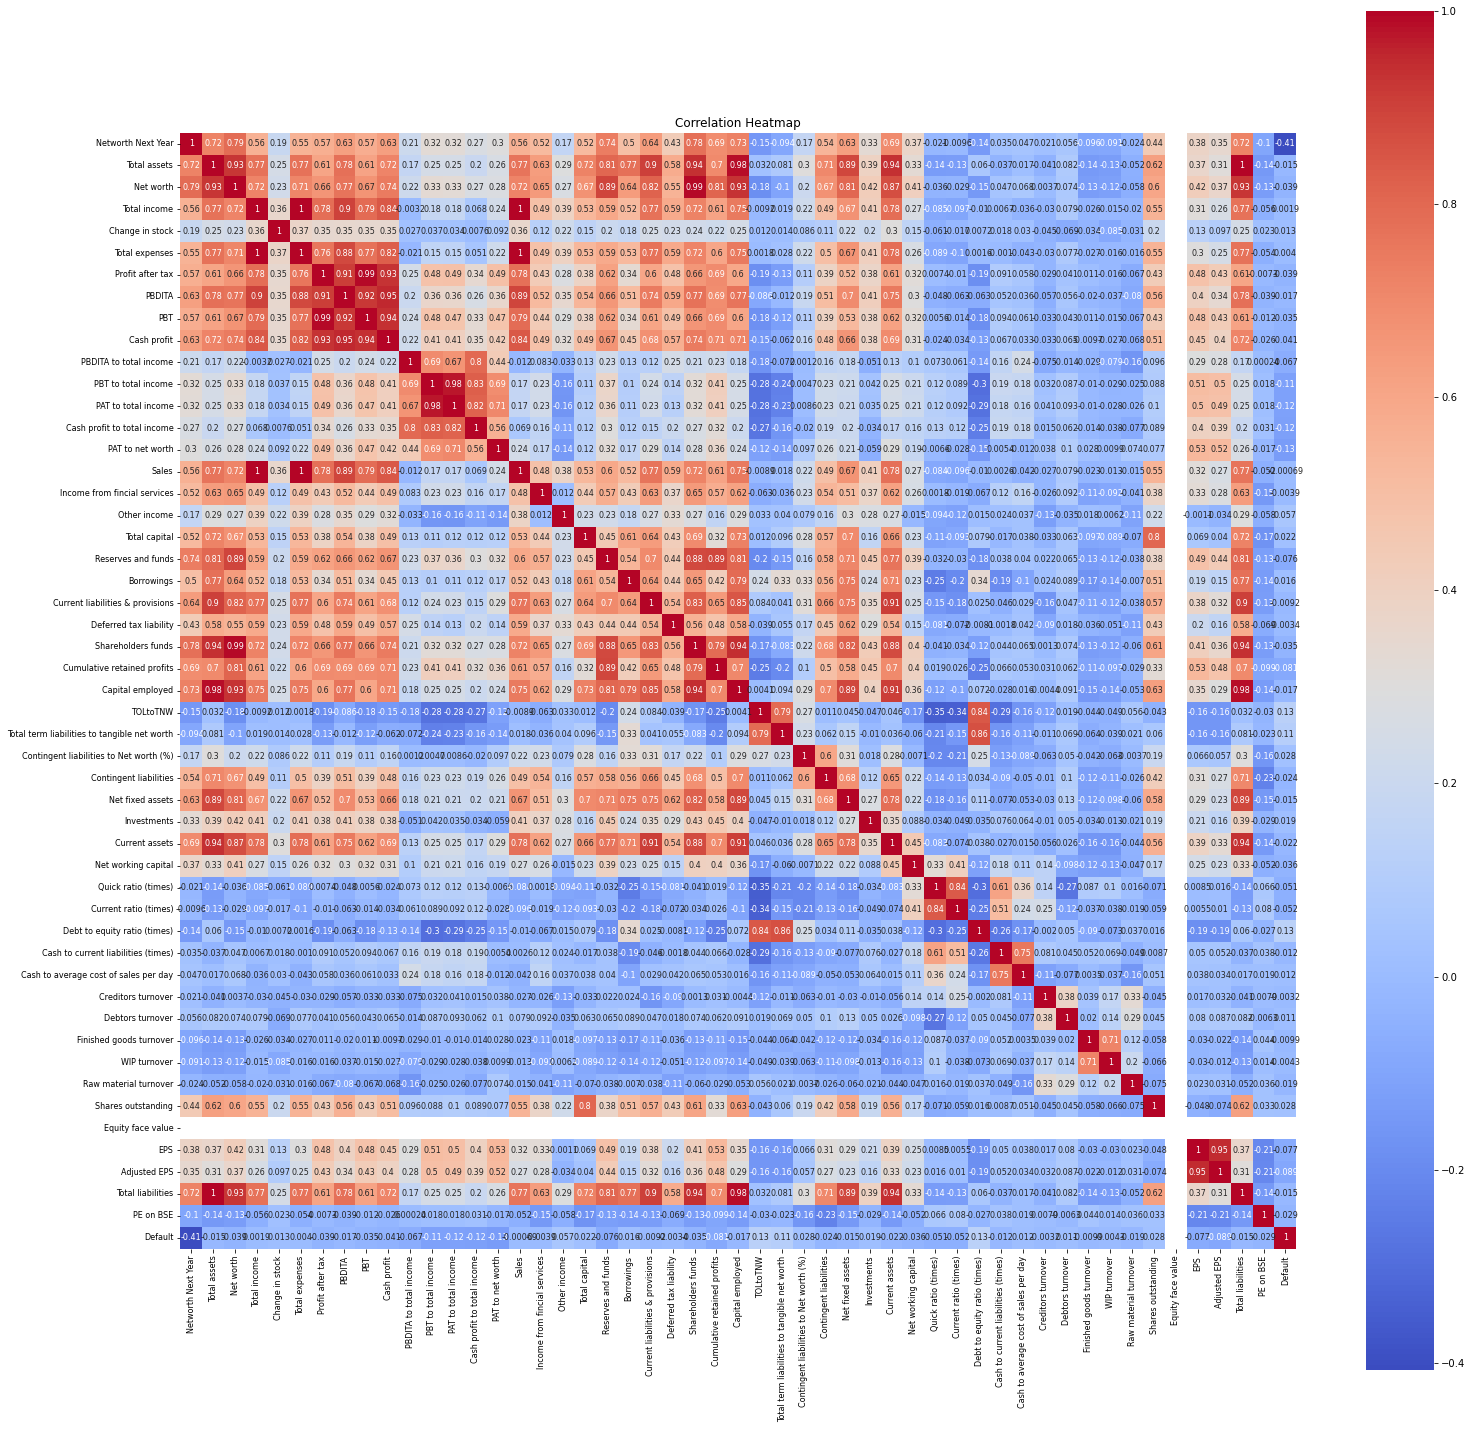

In [54]:
plt.figure(figsize=(25, 25))
p = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True, annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

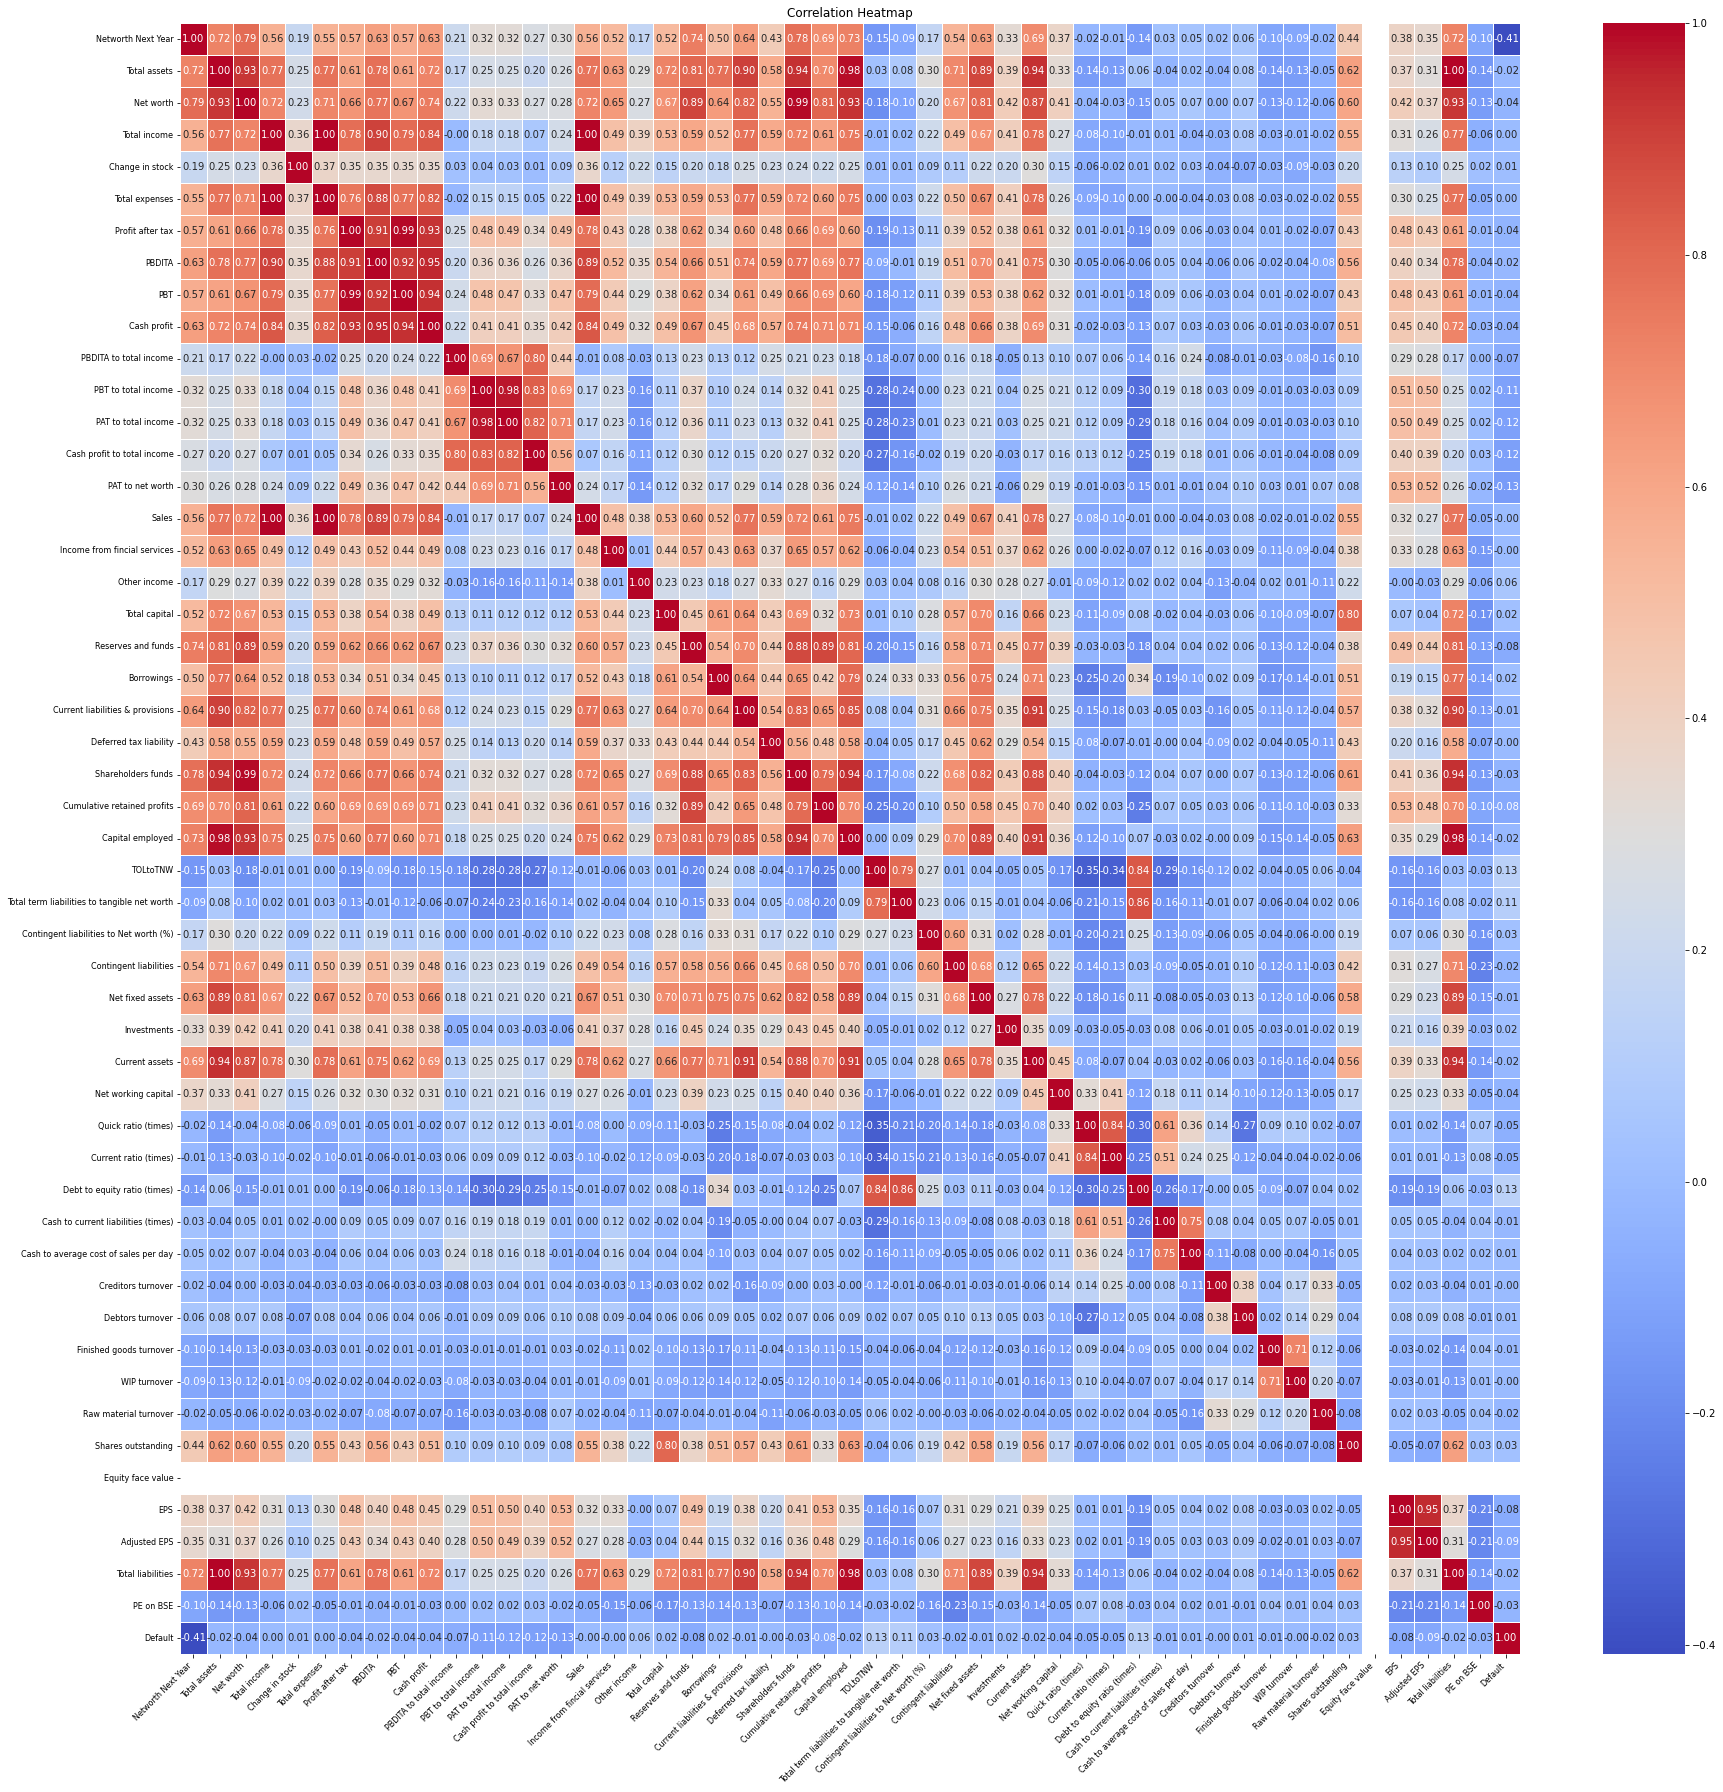

In [55]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title('Correlation Heatmap')
plt.show()

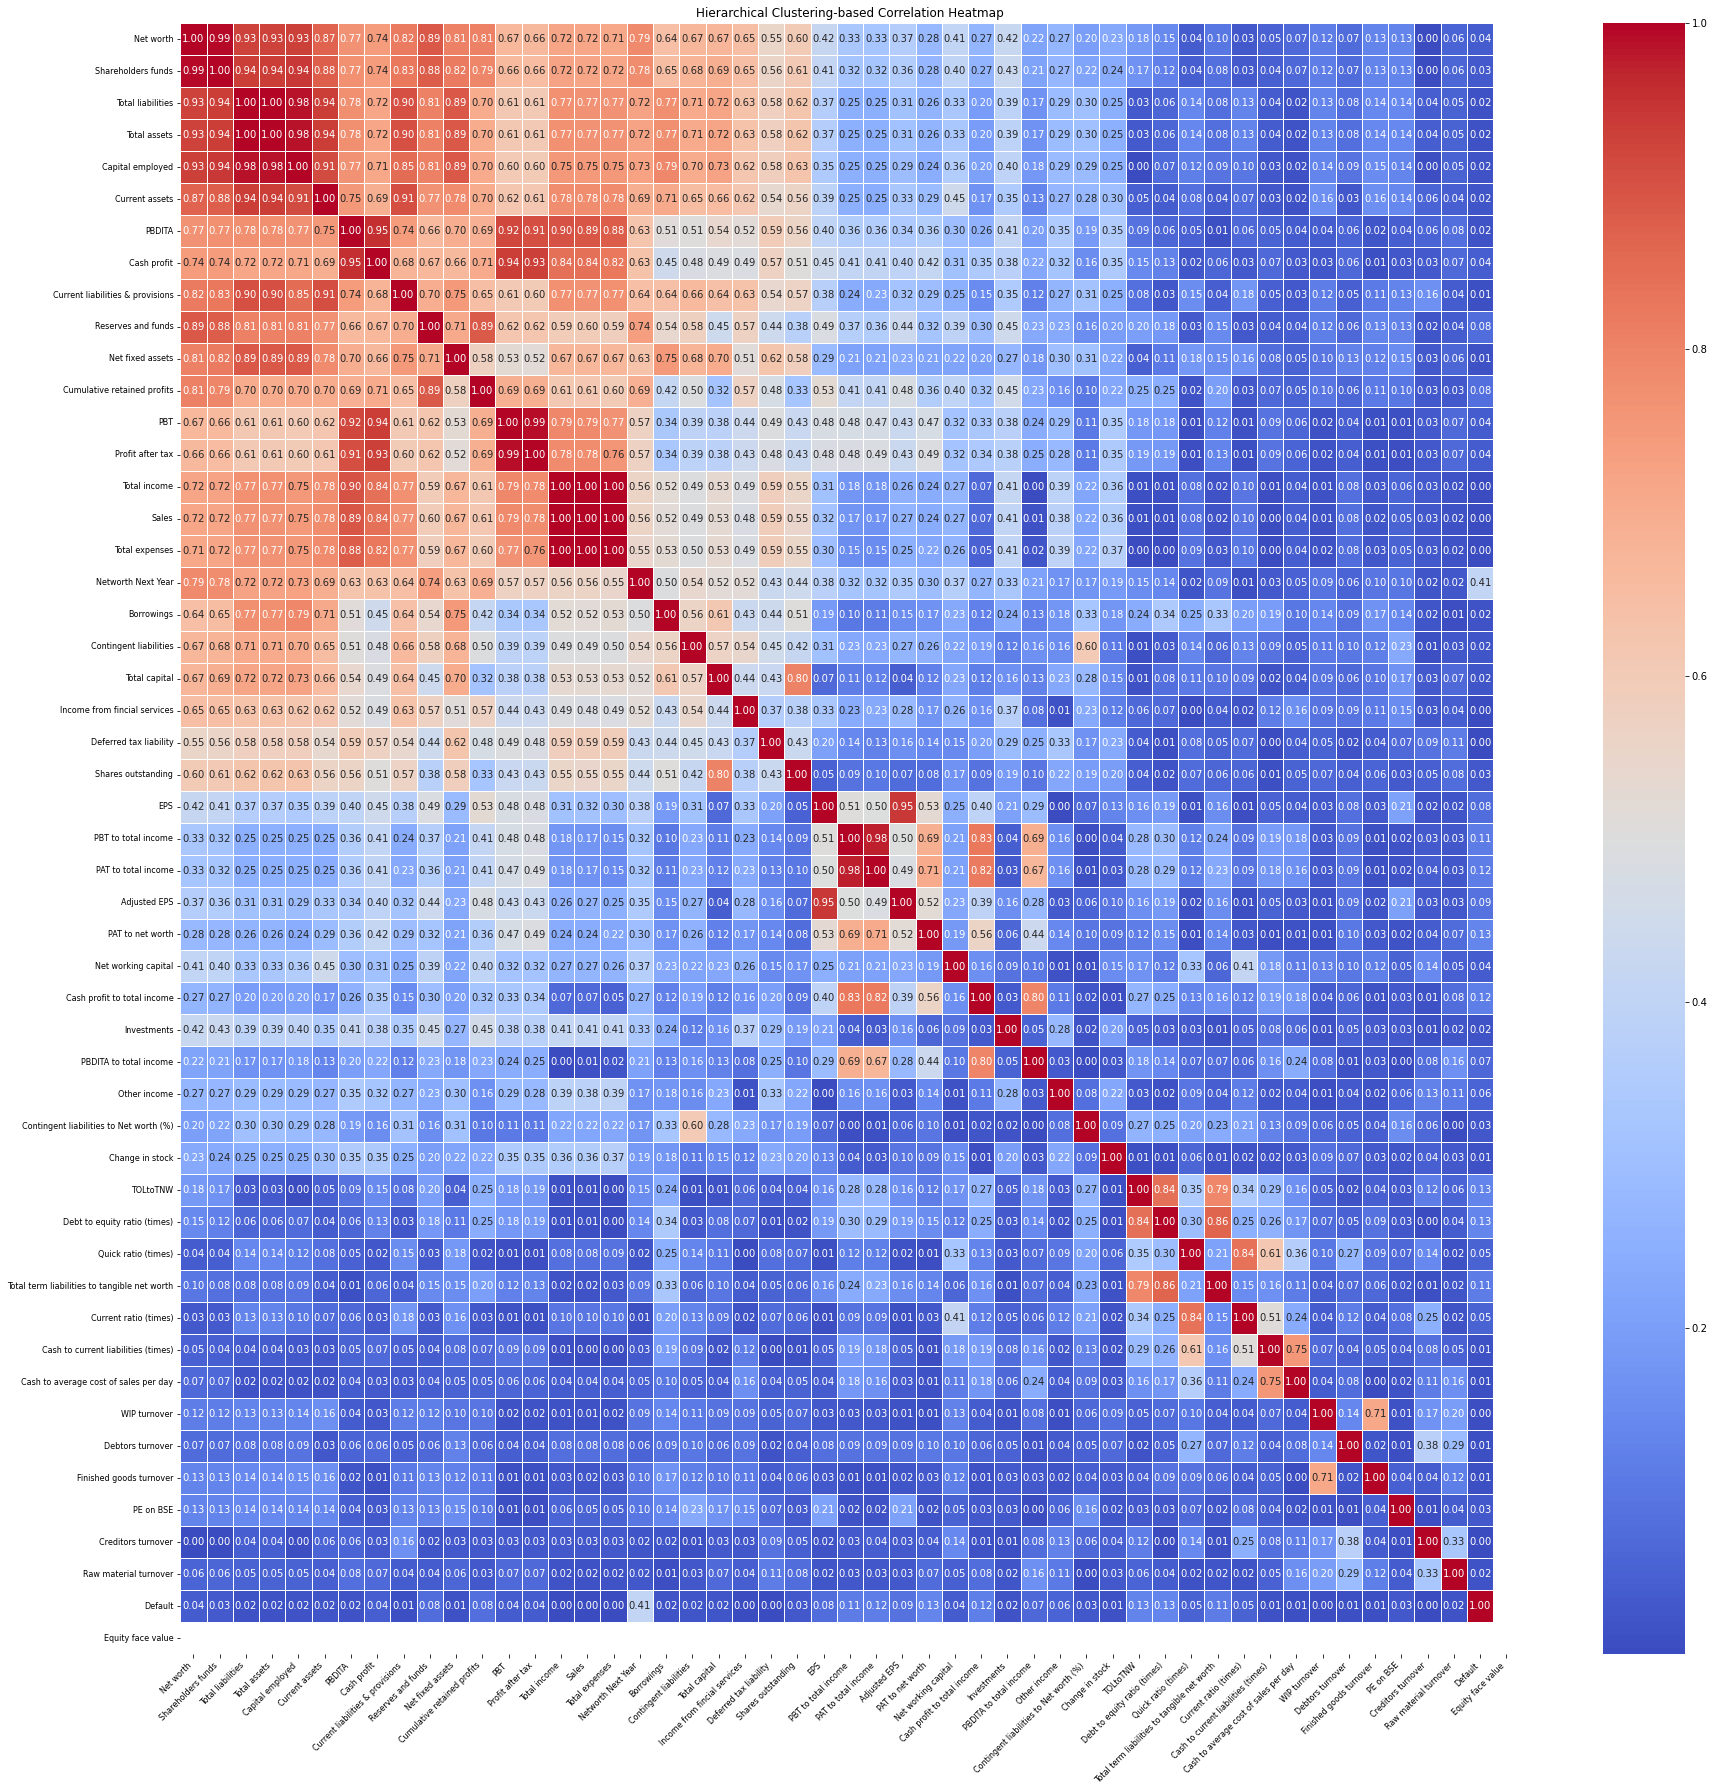

In [53]:
corr_matrix = df.corr()

clustered_corr = corr_matrix.abs().reindex(corr_matrix.abs().sum().sort_values(ascending=False).index, axis=1)
clustered_corr = clustered_corr.abs().reindex(clustered_corr.abs().sum().sort_values(ascending=False).index, axis=0)

plt.figure(figsize=(30,30))
sns.heatmap(clustered_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title('Hierarchical Clustering-based Correlation Heatmap');

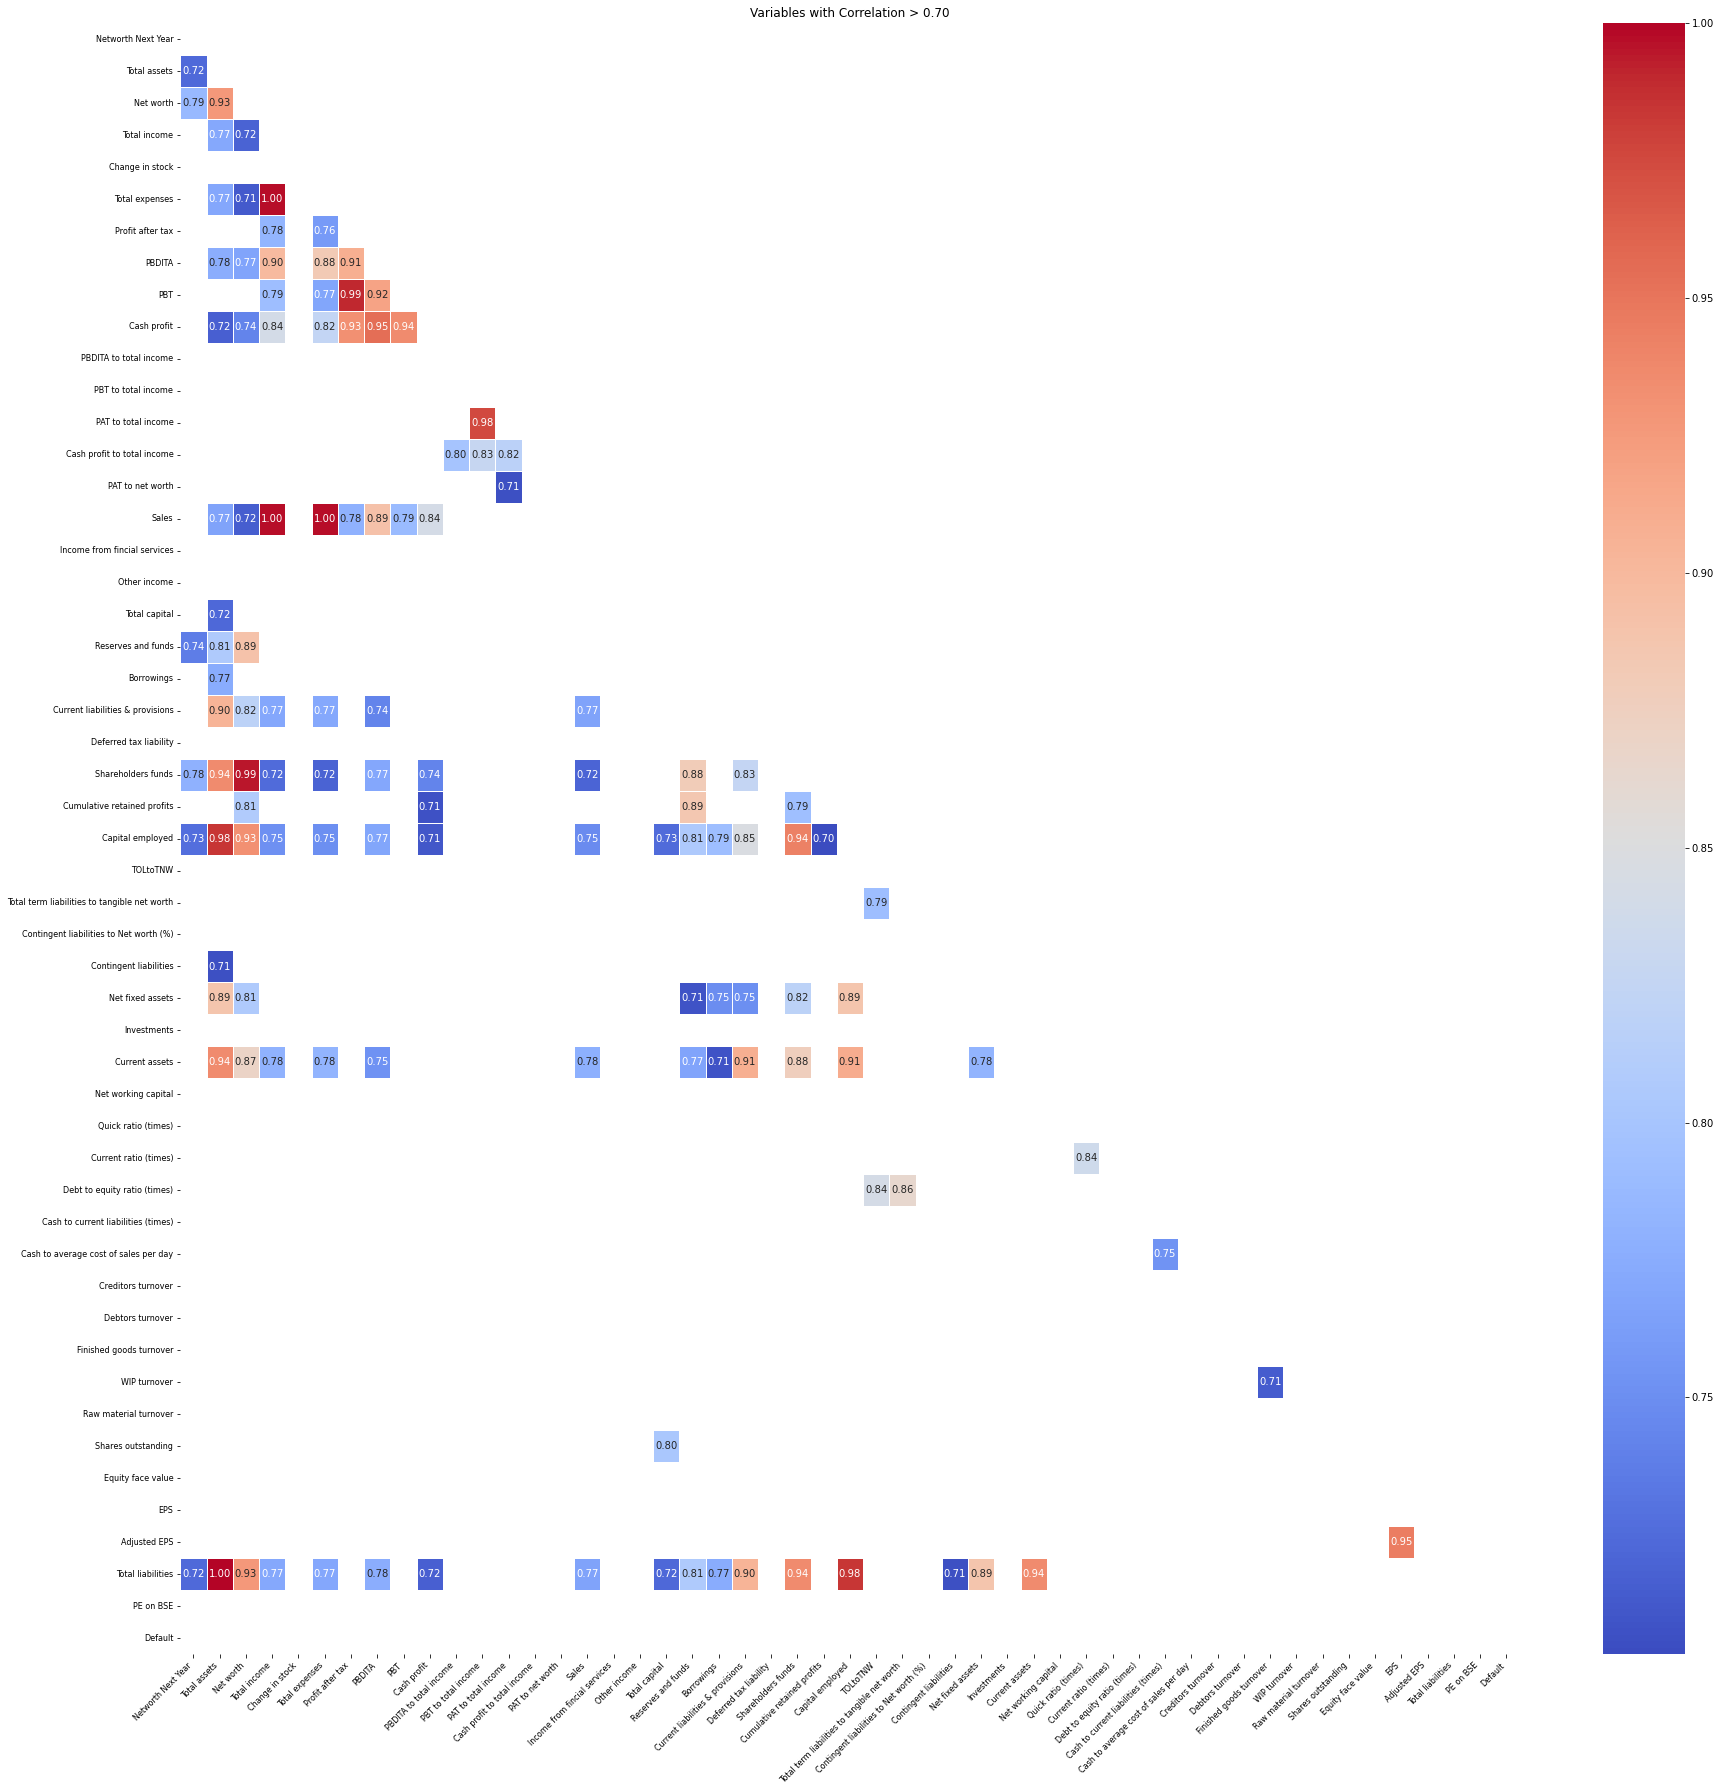

In [59]:
corr_matrix = df.corr()
high_corr_matrix = corr_matrix[corr_matrix.abs() > 0.70]
mask = np.triu(np.ones_like(high_corr_matrix, dtype=bool))
plt.figure(figsize=(30, 30))
sns.heatmap(high_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, mask=mask)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title('Variables with Correlation > 0.70');

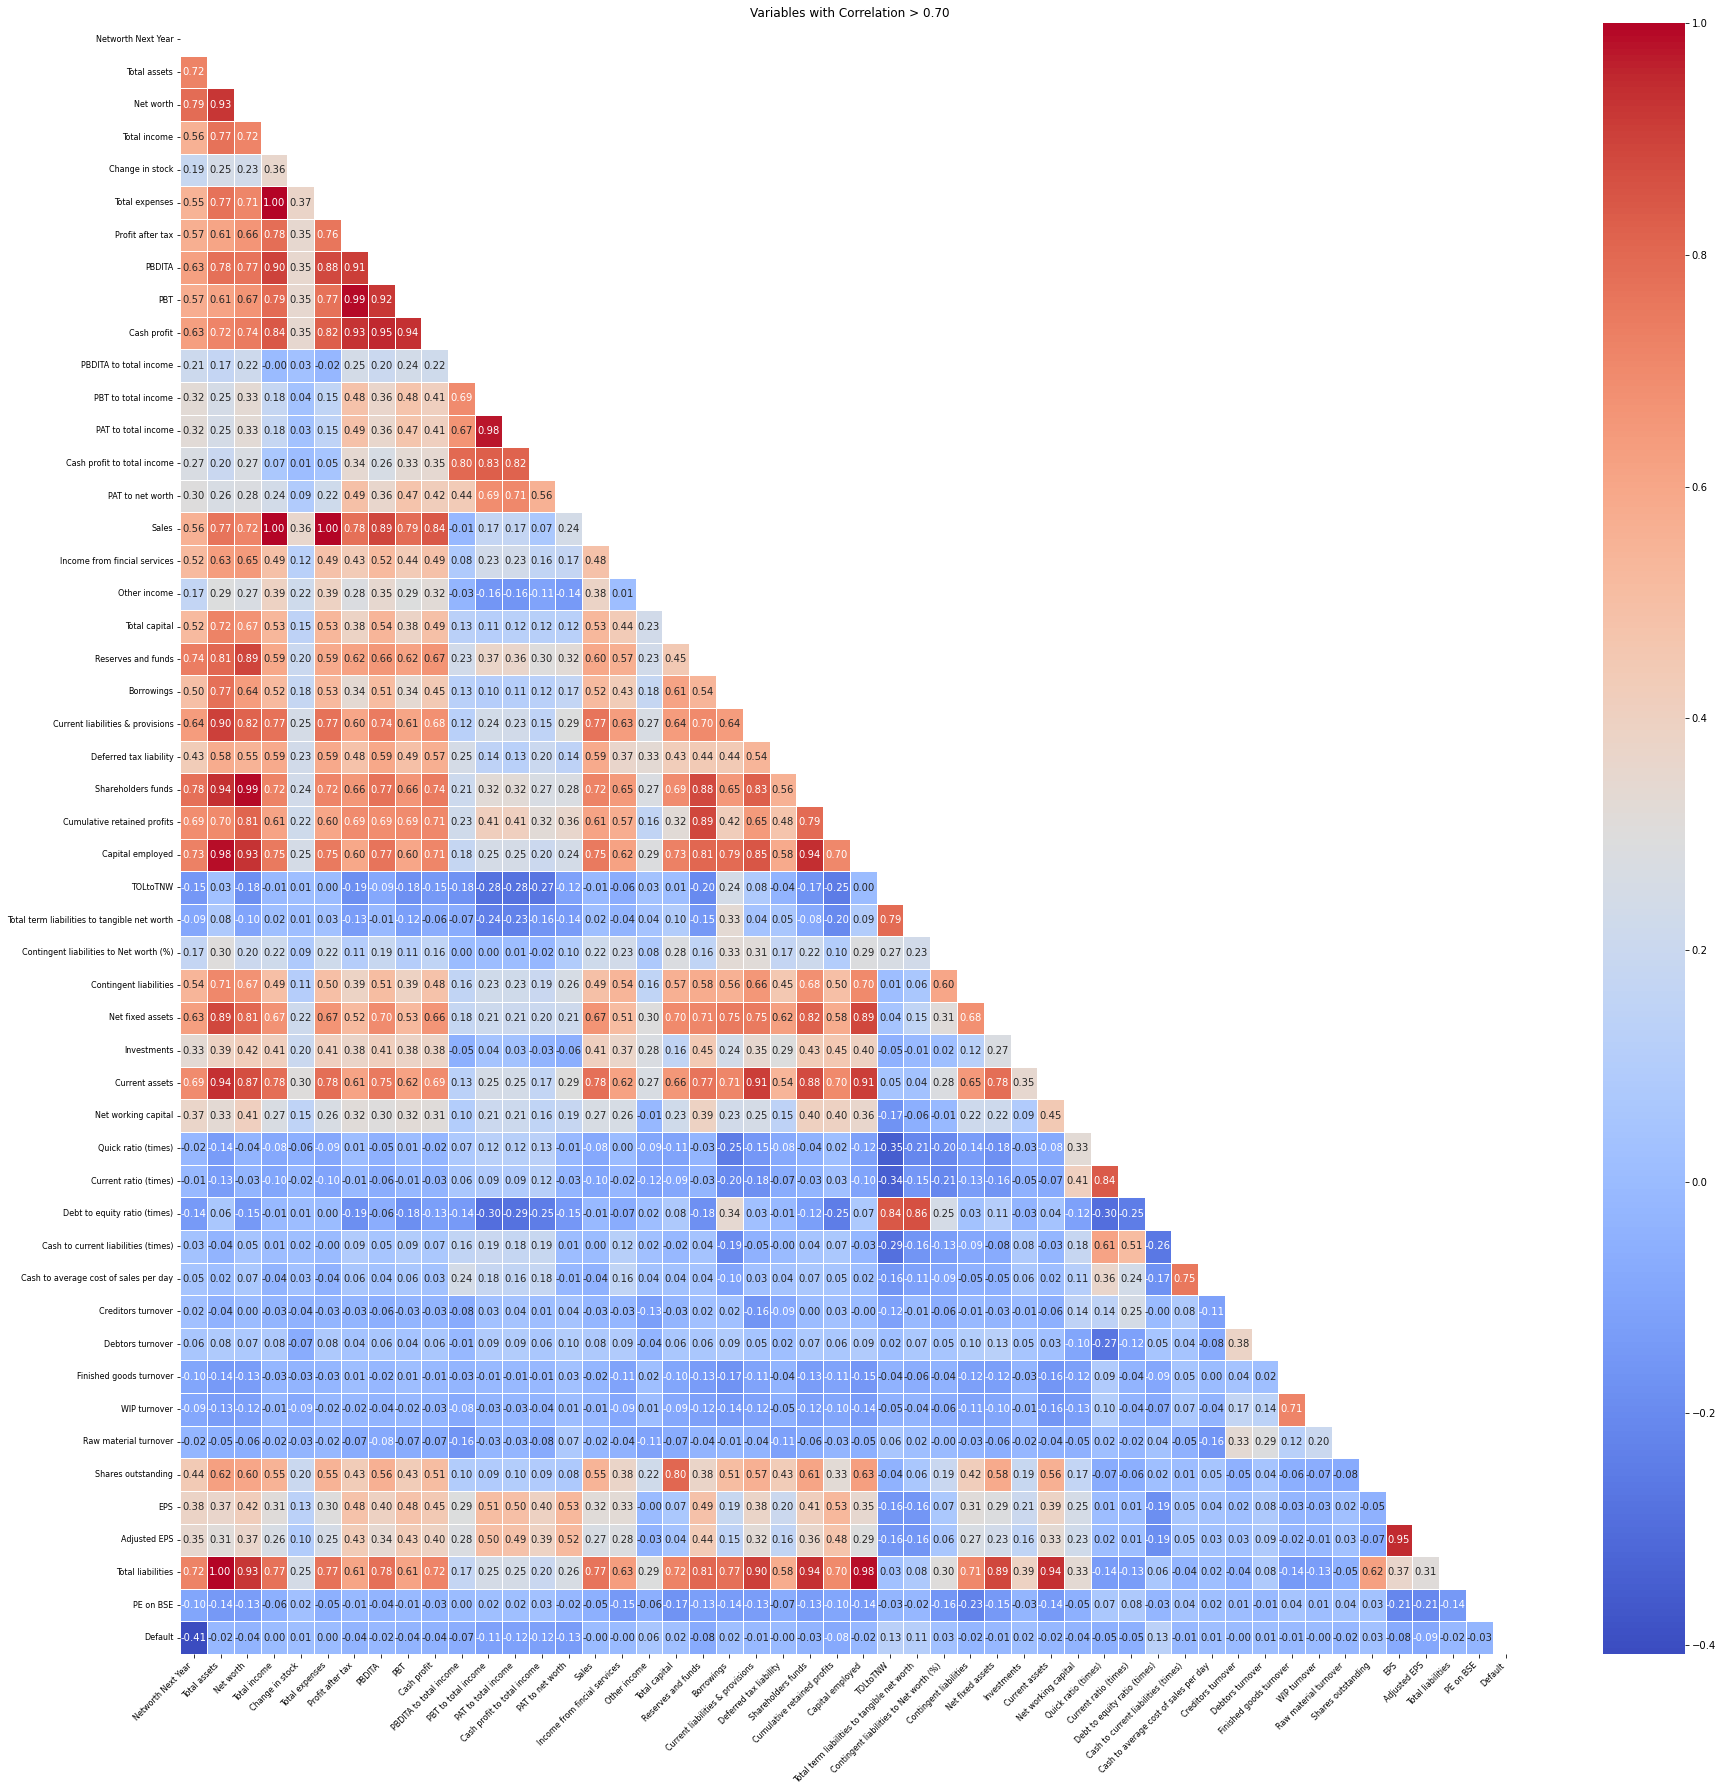

In [62]:
corr_matrix = df.corr()

high_corr_vars = corr_matrix.columns[(corr_matrix.abs() > 0.70).any()]

df_subset = df[high_corr_vars]

subset_corr_matrix = df_subset.corr()

mask = np.triu(np.ones_like(subset_corr_matrix, dtype=bool))

plt.figure(figsize=(30, 30))
sns.heatmap(subset_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, mask=mask)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title('Variables with Correlation > 0.70');

In [63]:
import statsmodels.formula.api as SM

In [64]:
df.columns

Index(['Networth Next Year', 'Total assets', 'Net worth', 'Total income',
       'Change in stock', 'Total expenses', 'Profit after tax', 'PBDITA',
       'PBT', 'Cash profit', 'PBDITA to total income', 'PBT to total income',
       'PAT to total income', 'Cash profit to total income',
       'PAT to net worth', 'Sales', 'Income from fincial services',
       'Other income', 'Total capital', 'Reserves and funds', 'Borrowings',
       'Current liabilities & provisions', 'Deferred tax liability',
       'Shareholders funds', 'Cumulative retained profits', 'Capital employed',
       'TOLtoTNW', 'Total term liabilities to tangible net worth',
       'Contingent liabilities to Net worth (%)', 'Contingent liabilities',
       'Net fixed assets', 'Investments', 'Current assets',
       'Net working capital', 'Quick ratio (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Cash to current liabilities (times)',
       'Cash to average cost of sales per day', 'Creditors tu

In [72]:
df.columns = df.columns.str.replace(' ', '_')

In [91]:
df.columns = df.columns.str.replace("_(times)", "")

In [92]:
df.columns

Index(['Networth_Next_Year', 'Total_assets', 'Net_worth', 'Total_income',
       'Change_in_stock', 'Total_expenses', 'Profit_after_tax', 'PBDITA',
       'PBT', 'Cash_profit', 'PBDITA_to_total_income', 'PBT_to_total_income',
       'PAT_to_total_income', 'Cash_profit_to_total_income',
       'PAT_to_net_worth', 'Sales', 'Income_from_fincial_services',
       'Other_income', 'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_&_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOLtoTNW', 'Total_term_liabilities_to_tangible_net_worth',
       'Contingent_liabilities_to_Net_worth', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_(times)', 'Current_ratio_(times)',
       'Debt_to_equity_ratio_(times)', 'Cash_to_current_liabilities_(times)',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnov

In [82]:
df.rename(columns={"Contingent_liabilities_to_Net_worth_(%)": "Contingent_liabilities_to_Net_worth"}, inplace=True)

In [93]:
df.rename(columns={"Quick_ratio_(times)": "Quick_ratio"}, inplace=True)

In [94]:
df.rename(columns={"Current_ratio_(times)": "Current_ratio"}, inplace=True)

In [95]:
df.rename(columns={"Debt_to_equity_ratio_(times)": "Debt_to_equity_ratio"}, inplace=True)

In [96]:
df.rename(columns={"Cash_to_current_liabilities_(times)": "Cash_to_current_liabilities"}, inplace=True)

In [104]:
df.rename(columns={"Current_liabilities_&_provisions": "Current_liabilities_provisions"}, inplace=True)

In [105]:
df.columns

Index(['Networth_Next_Year', 'Total_assets', 'Net_worth', 'Total_income',
       'Change_in_stock', 'Total_expenses', 'Profit_after_tax', 'PBDITA',
       'PBT', 'Cash_profit', 'PBDITA_to_total_income', 'PBT_to_total_income',
       'PAT_to_total_income', 'Cash_profit_to_total_income',
       'PAT_to_net_worth', 'Sales', 'Income_from_fincial_services',
       'Other_income', 'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOLtoTNW', 'Total_term_liabilities_to_tangible_net_worth',
       'Contingent_liabilities_to_Net_worth', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio', 'Current_ratio',
       'Debt_to_equity_ratio', 'Cash_to_current_liabilities',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'F

In [106]:
f_1 = "Default ~ Networth_Next_Year + Total_assets + Net_worth + Total_income + Change_in_stock + Total_expenses + Profit_after_tax + PBDITA + PBT + Cash_profit + PBDITA_to_total_income + PBT_to_total_income + PAT_to_total_income + Cash_profit_to_total_income + PAT_to_net_worth + Sales + Income_from_fincial_services + Other_income + Total_capital + Reserves_and_funds + Borrowings + Current_liabilities_provisions + Deferred_tax_liability + Shareholders_funds + Cumulative_retained_profits + Capital_employed + TOLtoTNW + Total_term_liabilities_to_tangible_net_worth + Contingent_liabilities_to_Net_worth + Contingent_liabilities + Net_fixed_assets + Investments + Current_assets + Net_working_capital + Quick_ratio + Current_ratio + Debt_to_equity_ratio + Cash_to_current_liabilities + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + Shares_outstanding + Equity_face_value + EPS + Adjusted_EPS + Total_liabilities + PE_on_BSE"

In [107]:
model_1 = SM.logit(formula = f_1, data=df).fit()

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [109]:
X = df.drop('Default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
48                             Total_liabilities         inf
1                                   Total_assets         inf
3                                   Total_income  368.995409
5                                 Total_expenses  342.579975
15                                         Sales  303.688547
23                            Shareholders_funds  124.546995
2                                      Net_worth  115.441345
25                              Capital_employed   75.372532
8                                            PBT   74.961730
6                               Profit_after_tax   70.427931
7                                         PBDITA   29.131656
11                           PBT_to_total_income   27.784258
12                           PAT_to_total_income   26.420783
9                                    Cash_profit   23.230341
45                             Equity_face_value   22.093824
32                                Current_assets   16.532550
21                Current_liabilities_provisions   13.562122
19                            Reserves_and_funds   11.575112
46                                           EPS   10.920059
47                                  Adjusted_EPS    9.867204
30                              Net_fixed_assets    8.138913
24                   Cumulative_retained_profits    7.631183
36                          Debt_to_equity_ratio    6.633373
13                   Cash_profit_to_total_income    6.170947
34                                   Quick_ratio    5.672585
26                                      TOLtoTNW    5.484677
18                                 Total_capital    5.415958
27  Total_term_liabilities_to_tangible_net_worth    5.248697
35                                 Current_ratio    4.778970
20                                    Borrowings    4.398712
37                   Cash_to_current_liabilities    4.255850
29                        Contingent_liabilities    3.978183
10                        PBDITA_to_total_income    3.924585
44                            Shares_outstanding    3.923202
38         Cash_to_average_cost_of_sales_per_day    3.086887
0                             Networth_Next_Year    2.839983
14                              PAT_to_net_worth    2.774501
22                        Deferred_tax_liability    2.445816
42                                  WIP_turnover    2.343051
16                  Income_from_fincial_services    2.321909
41                       Finished_goods_turnover    2.158262
33                           Net_working_capital    2.152129
28           Contingent_liabilities_to_Net_worth    2.015934
31                                   Investments    1.862648
40                              Debtors_turnover    1.814647
39                            Creditors_turnover    1.652115
17                                  Other_income    1.642237
4                                Change_in_stock    1.461981
43                         Raw_material_turnover    1.338014
49                                     PE_on_BSE    1.249263

In [110]:
X = X.drop('Total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
47                             Total_liabilities         inf
1                                   Total_assets         inf
14                                         Sales  240.580658
4                                 Total_expenses  235.230719
22                            Shareholders_funds  124.317706
2                                      Net_worth  114.994762
24                              Capital_employed   75.181458
7                                            PBT   74.961263
5                               Profit_after_tax   70.178037
10                           PBT_to_total_income   27.784189
11                           PAT_to_total_income   26.397921
6                                         PBDITA   26.189227
8                                    Cash_profit   22.172478
44                             Equity_face_value   22.085542
31                                Current_assets   16.519332
20                Current_liabilities_provisions   13.552870
18                            Reserves_and_funds   11.506965
45                                           EPS   10.911482
46                                  Adjusted_EPS    9.867089
29                              Net_fixed_assets    8.103412
23                   Cumulative_retained_profits    7.630442
35                          Debt_to_equity_ratio    6.627439
12                   Cash_profit_to_total_income    6.130261
33                                   Quick_ratio    5.672204
25                                      TOLtoTNW    5.482553
17                                 Total_capital    5.415690
26  Total_term_liabilities_to_tangible_net_worth    5.248591
34                                 Current_ratio    4.775074
19                                    Borrowings    4.397646
36                   Cash_to_current_liabilities    4.246105
28                        Contingent_liabilities    3.977063
43                            Shares_outstanding    3.925238
9                         PBDITA_to_total_income    3.889738
37         Cash_to_average_cost_of_sales_per_day    3.081878
0                             Networth_Next_Year    2.838161
13                              PAT_to_net_worth    2.774481
21                        Deferred_tax_liability    2.394172
41                                  WIP_turnover    2.343051
15                  Income_from_fincial_services    2.317148
40                       Finished_goods_turnover    2.156294
32                           Net_working_capital    2.144938
27           Contingent_liabilities_to_Net_worth    2.015917
30                                   Investments    1.853591
39                              Debtors_turnover    1.814645
38                            Creditors_turnover    1.651767
16                                  Other_income    1.631346
3                                Change_in_stock    1.401572
42                         Raw_material_turnover    1.337584
48                                     PE_on_BSE    1.245144

In [111]:
X = X.drop('Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
46                             Total_liabilities         inf
1                                   Total_assets         inf
21                            Shareholders_funds  123.527338
2                                      Net_worth  114.789160
23                              Capital_employed   75.164199
7                                            PBT   74.891795
5                               Profit_after_tax   69.624412
10                           PBT_to_total_income   27.750028
11                           PAT_to_total_income   26.356134
6                                         PBDITA   25.985987
43                             Equity_face_value   22.060661
8                                    Cash_profit   21.528952
30                                Current_assets   16.518674
19                Current_liabilities_provisions   13.524159
17                            Reserves_and_funds   11.485596
44                                           EPS   10.898300
45                                  Adjusted_EPS    9.865197
4                                 Total_expenses    8.293379
28                              Net_fixed_assets    8.086025
22                   Cumulative_retained_profits    7.604775
34                          Debt_to_equity_ratio    6.626697
12                   Cash_profit_to_total_income    6.120508
32                                   Quick_ratio    5.669187
24                                      TOLtoTNW    5.473530
16                                 Total_capital    5.415027
25  Total_term_liabilities_to_tangible_net_worth    5.237456
33                                 Current_ratio    4.770889
18                                    Borrowings    4.392096
35                   Cash_to_current_liabilities    4.246012
27                        Contingent_liabilities    3.969270
42                            Shares_outstanding    3.920158
9                         PBDITA_to_total_income    3.872282
36         Cash_to_average_cost_of_sales_per_day    3.081673
0                             Networth_Next_Year    2.826040
13                              PAT_to_net_worth    2.773357
20                        Deferred_tax_liability    2.393328
40                                  WIP_turnover    2.342741
14                  Income_from_fincial_services    2.309290
39                       Finished_goods_turnover    2.156277
31                           Net_working_capital    2.144399
26           Contingent_liabilities_to_Net_worth    2.010605
29                                   Investments    1.851690
38                              Debtors_turnover    1.813838
37                            Creditors_turnover    1.651766
15                                  Other_income    1.621820
41                         Raw_material_turnover    1.336875
3                                Change_in_stock    1.314850
47                                     PE_on_BSE    1.245139

In [112]:
X = X.drop('Shareholders_funds', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
1                                   Total_assets        inf
45                             Total_liabilities        inf
7                                            PBT  74.879993
22                              Capital_employed  72.994795
5                               Profit_after_tax  69.612437
10                           PBT_to_total_income  27.749218
11                           PAT_to_total_income  26.354213
6                                         PBDITA  25.972311
2                                      Net_worth  24.043289
42                             Equity_face_value  21.962569
8                                    Cash_profit  21.403874
29                                Current_assets  16.507349
19                Current_liabilities_provisions  13.490137
17                            Reserves_and_funds  11.481507
43                                           EPS  10.896593
44                                  Adjusted_EPS   9.862220
4                                 Total_expenses   8.289391
27                              Net_fixed_assets   8.086000
21                   Cumulative_retained_profits   7.602439
33                          Debt_to_equity_ratio   6.535113
12                   Cash_profit_to_total_income   6.116097
31                                   Quick_ratio   5.669186
23                                      TOLtoTNW   5.445439
24  Total_term_liabilities_to_tangible_net_worth   5.216998
16                                 Total_capital   5.149493
32                                 Current_ratio   4.768649
34                   Cash_to_current_liabilities   4.245897
18                                    Borrowings   4.231045
26                        Contingent_liabilities   3.969143
41                            Shares_outstanding   3.876271
9                         PBDITA_to_total_income   3.871993
35         Cash_to_average_cost_of_sales_per_day   3.081394
0                             Networth_Next_Year   2.816144
13                              PAT_to_net_worth   2.773292
20                        Deferred_tax_liability   2.392650
39                                  WIP_turnover   2.342564
14                  Income_from_fincial_services   2.307533
38                       Finished_goods_turnover   2.156072
30                           Net_working_capital   2.144386
25           Contingent_liabilities_to_Net_worth   2.008041
28                                   Investments   1.818546
37                              Debtors_turnover   1.812057
36                            Creditors_turnover   1.651639
15                                  Other_income   1.621816
40                         Raw_material_turnover   1.336875
3                                Change_in_stock   1.313900
46                                     PE_on_BSE   1.239573

In [113]:
X = X.drop('PBT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
44                             Total_liabilities        inf
1                                   Total_assets        inf
21                              Capital_employed  72.885272
6                                         PBDITA  24.841011
2                                      Net_worth  23.989109
9                            PBT_to_total_income  23.710822
10                           PAT_to_total_income  23.092682
41                             Equity_face_value  21.928344
7                                    Cash_profit  21.295278
28                                Current_assets  16.507200
5                               Profit_after_tax  14.250534
18                Current_liabilities_provisions  13.456808
16                            Reserves_and_funds  11.481489
42                                           EPS  10.896567
43                                  Adjusted_EPS   9.861216
4                                 Total_expenses   8.283039
26                              Net_fixed_assets   8.083181
20                   Cumulative_retained_profits   7.601892
32                          Debt_to_equity_ratio   6.534963
11                   Cash_profit_to_total_income   6.061700
30                                   Quick_ratio   5.668055
22                                      TOLtoTNW   5.443557
23  Total_term_liabilities_to_tangible_net_worth   5.215296
15                                 Total_capital   5.145989
31                                 Current_ratio   4.763761
33                   Cash_to_current_liabilities   4.244916
17                                    Borrowings   4.228134
25                        Contingent_liabilities   3.967963
40                            Shares_outstanding   3.874375
8                         PBDITA_to_total_income   3.871515
34         Cash_to_average_cost_of_sales_per_day   3.081341
0                             Networth_Next_Year   2.816025
12                              PAT_to_net_worth   2.772494
19                        Deferred_tax_liability   2.391048
38                                  WIP_turnover   2.342551
13                  Income_from_fincial_services   2.305023
37                       Finished_goods_turnover   2.156072
29                           Net_working_capital   2.136104
24           Contingent_liabilities_to_Net_worth   2.006691
27                                   Investments   1.818520
36                              Debtors_turnover   1.810718
35                            Creditors_turnover   1.651625
14                                  Other_income   1.621597
39                         Raw_material_turnover   1.336718
3                                Change_in_stock   1.313548
45                                     PE_on_BSE   1.239264

In [114]:
X = X.drop('Capital_employed', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
43                             Total_liabilities        inf
1                                   Total_assets        inf
6                                         PBDITA  24.669928
9                            PBT_to_total_income  23.705988
10                           PAT_to_total_income  23.071294
40                             Equity_face_value  21.922882
2                                      Net_worth  21.327844
7                                    Cash_profit  21.291862
27                                Current_assets  16.474078
5                               Profit_after_tax  14.136471
16                            Reserves_and_funds  11.118190
41                                           EPS  10.895763
18                Current_liabilities_provisions  10.647188
42                                  Adjusted_EPS   9.860818
4                                 Total_expenses   8.270072
25                              Net_fixed_assets   8.080613
20                   Cumulative_retained_profits   7.453646
31                          Debt_to_equity_ratio   6.338554
11                   Cash_profit_to_total_income   6.051976
29                                   Quick_ratio   5.667417
21                                      TOLtoTNW   5.290225
22  Total_term_liabilities_to_tangible_net_worth   5.203232
15                                 Total_capital   5.141521
30                                 Current_ratio   4.763756
32                   Cash_to_current_liabilities   4.244636
17                                    Borrowings   3.965895
24                        Contingent_liabilities   3.938849
39                            Shares_outstanding   3.873561
8                         PBDITA_to_total_income   3.868632
33         Cash_to_average_cost_of_sales_per_day   3.081339
0                             Networth_Next_Year   2.815964
12                              PAT_to_net_worth   2.772154
19                        Deferred_tax_liability   2.389354
37                                  WIP_turnover   2.338185
13                  Income_from_fincial_services   2.305021
36                       Finished_goods_turnover   2.155355
28                           Net_working_capital   2.134826
23           Contingent_liabilities_to_Net_worth   2.004038
26                                   Investments   1.813080
35                              Debtors_turnover   1.809569
34                            Creditors_turnover   1.649569
14                                  Other_income   1.621528
38                         Raw_material_turnover   1.335818
3                                Change_in_stock   1.313238
44                                     PE_on_BSE   1.234353

In [115]:
X = X.drop('PBDITA', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
42                             Total_liabilities        inf
1                                   Total_assets        inf
8                            PBT_to_total_income  23.535127
9                            PAT_to_total_income  23.054699
39                             Equity_face_value  21.897600
2                                      Net_worth  21.318757
26                                Current_assets  16.437616
6                                    Cash_profit  15.364225
5                               Profit_after_tax  12.710974
40                                           EPS  10.892172
15                            Reserves_and_funds  10.852279
17                Current_liabilities_provisions  10.645628
41                                  Adjusted_EPS   9.857203
24                              Net_fixed_assets   8.074243
19                   Cumulative_retained_profits   7.444964
4                                 Total_expenses   7.211974
30                          Debt_to_equity_ratio   6.306655
10                   Cash_profit_to_total_income   5.763599
28                                   Quick_ratio   5.662420
20                                      TOLtoTNW   5.274468
21  Total_term_liabilities_to_tangible_net_worth   5.202973
14                                 Total_capital   5.118709
29                                 Current_ratio   4.763663
31                   Cash_to_current_liabilities   4.244261
16                                    Borrowings   3.964111
23                        Contingent_liabilities   3.935871
38                            Shares_outstanding   3.864283
7                         PBDITA_to_total_income   3.668331
32         Cash_to_average_cost_of_sales_per_day   3.080256
0                             Networth_Next_Year   2.815605
11                              PAT_to_net_worth   2.752488
18                        Deferred_tax_liability   2.387910
36                                  WIP_turnover   2.337899
12                  Income_from_fincial_services   2.301018
35                       Finished_goods_turnover   2.153215
27                           Net_working_capital   2.133037
22           Contingent_liabilities_to_Net_worth   2.003843
25                                   Investments   1.809903
34                              Debtors_turnover   1.809556
33                            Creditors_turnover   1.646348
13                                  Other_income   1.621526
37                         Raw_material_turnover   1.334167
3                                Change_in_stock   1.311702
43                                     PE_on_BSE   1.233956

In [116]:
X = X.drop('PBT_to_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
41                             Total_liabilities        inf
1                                   Total_assets        inf
38                             Equity_face_value  21.866439
2                                      Net_worth  21.317144
25                                Current_assets  16.435874
6                                    Cash_profit  15.360934
5                               Profit_after_tax  12.707831
39                                           EPS  10.891532
14                            Reserves_and_funds  10.852200
16                Current_liabilities_provisions  10.620103
40                                  Adjusted_EPS   9.853660
23                              Net_fixed_assets   8.063657
18                   Cumulative_retained_profits   7.442562
4                                 Total_expenses   7.181959
29                          Debt_to_equity_ratio   6.276419
9                    Cash_profit_to_total_income   5.680871
27                                   Quick_ratio   5.662283
8                            PAT_to_total_income   5.615810
19                                      TOLtoTNW   5.257346
20  Total_term_liabilities_to_tangible_net_worth   5.202601
13                                 Total_capital   5.118709
28                                 Current_ratio   4.761686
30                   Cash_to_current_liabilities   4.243337
15                                    Borrowings   3.963101
22                        Contingent_liabilities   3.935862
37                            Shares_outstanding   3.849872
7                         PBDITA_to_total_income   3.568295
31         Cash_to_average_cost_of_sales_per_day   3.073926
0                             Networth_Next_Year   2.815343
10                              PAT_to_net_worth   2.752485
17                        Deferred_tax_liability   2.386497
35                                  WIP_turnover   2.337883
11                  Income_from_fincial_services   2.301017
34                       Finished_goods_turnover   2.152964
26                           Net_working_capital   2.132640
21           Contingent_liabilities_to_Net_worth   2.003843
33                              Debtors_turnover   1.809201
24                                   Investments   1.808062
32                            Creditors_turnover   1.645818
12                                  Other_income   1.615863
36                         Raw_material_turnover   1.331493
3                                Change_in_stock   1.311493
42                                     PE_on_BSE   1.232934

In [117]:
X = X.drop('Equity_face_value', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
40                             Total_liabilities        inf
1                                   Total_assets        inf
2                                      Net_worth  35.270105
25                                Current_assets  27.826845
6                                    Cash_profit  22.783333
28                                 Current_ratio  18.278176
5                               Profit_after_tax  17.792961
16                Current_liabilities_provisions  17.509986
27                                   Quick_ratio  17.343778
14                            Reserves_and_funds  15.379445
38                                           EPS  14.717728
39                                  Adjusted_EPS  13.209895
23                              Net_fixed_assets  13.008029
29                          Debt_to_equity_ratio  11.923161
4                                 Total_expenses  11.753533
18                   Cumulative_retained_profits  10.250464
19                                      TOLtoTNW  10.238456
13                                 Total_capital   9.536958
9                    Cash_profit_to_total_income   9.308707
20  Total_term_liabilities_to_tangible_net_worth   8.476756
7                         PBDITA_to_total_income   7.542232
37                            Shares_outstanding   7.306329
30                   Cash_to_current_liabilities   7.007541
8                            PAT_to_total_income   6.939644
15                                    Borrowings   5.282373
35                                  WIP_turnover   5.186029
31         Cash_to_average_cost_of_sales_per_day   5.075199
0                             Networth_Next_Year   4.348406
34                       Finished_goods_turnover   4.139658
33                              Debtors_turnover   4.026950
22                        Contingent_liabilities   4.012233
32                            Creditors_turnover   3.732098
10                              PAT_to_net_worth   3.685647
17                        Deferred_tax_liability   3.344536
21           Contingent_liabilities_to_Net_worth   2.960040
36                         Raw_material_turnover   2.942373
26                           Net_working_capital   2.567091
11                  Income_from_fincial_services   2.466810
24                                   Investments   2.034469
12                                  Other_income   1.893154
41                                     PE_on_BSE   1.696748
3                                Change_in_stock   1.525729

In [118]:
X = X.drop('Net_worth', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
39                             Total_liabilities        inf
1                                   Total_assets        inf
24                                Current_assets  27.752056
5                                    Cash_profit  22.764158
27                                 Current_ratio  18.216560
4                               Profit_after_tax  17.780218
15                Current_liabilities_provisions  17.421214
26                                   Quick_ratio  17.341580
37                                           EPS  14.710742
13                            Reserves_and_funds  13.319418
38                                  Adjusted_EPS  13.208741
22                              Net_fixed_assets  12.824309
28                          Debt_to_equity_ratio  11.857288
3                                 Total_expenses  11.737466
18                                      TOLtoTNW  10.183601
17                   Cumulative_retained_profits  10.103046
8                    Cash_profit_to_total_income   9.308589
12                                 Total_capital   9.150067
19  Total_term_liabilities_to_tangible_net_worth   8.476610
6                         PBDITA_to_total_income   7.537139
36                            Shares_outstanding   7.178200
29                   Cash_to_current_liabilities   7.000443
7                            PAT_to_total_income   6.938292
14                                    Borrowings   5.225072
34                                  WIP_turnover   5.177415
30         Cash_to_average_cost_of_sales_per_day   5.067899
0                             Networth_Next_Year   4.181851
33                       Finished_goods_turnover   4.138384
32                              Debtors_turnover   4.022852
21                        Contingent_liabilities   3.951871
31                            Creditors_turnover   3.731206
9                               PAT_to_net_worth   3.650442
16                        Deferred_tax_liability   3.341223
35                         Raw_material_turnover   2.939348
20           Contingent_liabilities_to_Net_worth   2.923230
25                           Net_working_capital   2.546115
10                  Income_from_fincial_services   2.455024
23                                   Investments   2.033147
11                                  Other_income   1.891131
40                                     PE_on_BSE   1.694922
2                                Change_in_stock   1.525691

In [119]:
X = X.drop('Current_assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
38                             Total_liabilities        inf
1                                   Total_assets        inf
5                                    Cash_profit  22.618796
26                                 Current_ratio  18.216482
4                               Profit_after_tax  17.779446
25                                   Quick_ratio  17.329772
15                Current_liabilities_provisions  14.988554
36                                           EPS  14.710672
13                            Reserves_and_funds  13.300123
37                                  Adjusted_EPS  13.208675
22                              Net_fixed_assets  12.658768
27                          Debt_to_equity_ratio  11.816101
3                                 Total_expenses  11.222605
17                   Cumulative_retained_profits  10.066547
18                                      TOLtoTNW   9.998259
8                    Cash_profit_to_total_income   9.306397
12                                 Total_capital   9.128287
19  Total_term_liabilities_to_tangible_net_worth   8.203086
6                         PBDITA_to_total_income   7.534429
35                            Shares_outstanding   7.158673
28                   Cash_to_current_liabilities   7.000230
7                            PAT_to_total_income   6.938153
14                                    Borrowings   5.170390
33                                  WIP_turnover   5.160650
29         Cash_to_average_cost_of_sales_per_day   5.056020
0                             Networth_Next_Year   4.178678
32                       Finished_goods_turnover   4.135811
31                              Debtors_turnover   4.015705
21                        Contingent_liabilities   3.939663
30                            Creditors_turnover   3.730970
9                               PAT_to_net_worth   3.644656
16                        Deferred_tax_liability   3.340491
34                         Raw_material_turnover   2.939049
20           Contingent_liabilities_to_Net_worth   2.923226
10                  Income_from_fincial_services   2.452711
24                           Net_working_capital   2.113469
23                                   Investments   2.003848
11                                  Other_income   1.883925
39                                     PE_on_BSE   1.694268
2                                Change_in_stock   1.492203

In [120]:
X = X.drop('Cash_profit', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
37                             Total_liabilities        inf
1                                   Total_assets        inf
25                                 Current_ratio  18.203584
24                                   Quick_ratio  17.329566
14                Current_liabilities_provisions  14.889514
35                                           EPS  14.710652
12                            Reserves_and_funds  13.268929
36                                  Adjusted_EPS  13.208334
21                              Net_fixed_assets  12.078459
26                          Debt_to_equity_ratio  11.815713
3                                 Total_expenses  10.378100
16                   Cumulative_retained_profits  10.046304
17                                      TOLtoTNW   9.973962
11                                 Total_capital   9.122585
18  Total_term_liabilities_to_tangible_net_worth   8.169733
7                    Cash_profit_to_total_income   8.126338
5                         PBDITA_to_total_income   7.391745
34                            Shares_outstanding   7.152449
4                               Profit_after_tax   7.108411
27                   Cash_to_current_liabilities   6.999195
6                            PAT_to_total_income   6.522158
32                                  WIP_turnover   5.158237
13                                    Borrowings   5.137454
28         Cash_to_average_cost_of_sales_per_day   5.054421
0                             Networth_Next_Year   4.155513
31                       Finished_goods_turnover   4.132997
30                              Debtors_turnover   4.015624
20                        Contingent_liabilities   3.935602
29                            Creditors_turnover   3.724500
8                               PAT_to_net_worth   3.644602
15                        Deferred_tax_liability   3.340239
33                         Raw_material_turnover   2.938768
19           Contingent_liabilities_to_Net_worth   2.918210
9                   Income_from_fincial_services   2.449845
23                           Net_working_capital   2.113019
22                                   Investments   2.003097
10                                  Other_income   1.883431
38                                     PE_on_BSE   1.692223
2                                Change_in_stock   1.492009

In [121]:
X = X.drop('Current_ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
36                             Total_liabilities        inf
1                                   Total_assets        inf
14                Current_liabilities_provisions  14.882427
34                                           EPS  14.683764
12                            Reserves_and_funds  13.264896
35                                  Adjusted_EPS  13.207915
21                              Net_fixed_assets  12.078437
25                          Debt_to_equity_ratio  11.807461
3                                 Total_expenses  10.376741
16                   Cumulative_retained_profits  10.022543
17                                      TOLtoTNW   9.970540
11                                 Total_capital   9.101145
18  Total_term_liabilities_to_tangible_net_worth   8.148585
7                    Cash_profit_to_total_income   8.124475
5                         PBDITA_to_total_income   7.319227
33                            Shares_outstanding   7.137184
4                               Profit_after_tax   7.095181
26                   Cash_to_current_liabilities   6.992246
6                            PAT_to_total_income   6.489269
24                                   Quick_ratio   5.984321
13                                    Borrowings   5.134716
31                                  WIP_turnover   5.058659
27         Cash_to_average_cost_of_sales_per_day   5.029557
0                             Networth_Next_Year   4.151734
30                       Finished_goods_turnover   4.131817
20                        Contingent_liabilities   3.899355
8                               PAT_to_net_worth   3.639930
28                            Creditors_turnover   3.612435
29                              Debtors_turnover   3.598002
15                        Deferred_tax_liability   3.337841
32                         Raw_material_turnover   2.912984
19           Contingent_liabilities_to_Net_worth   2.900618
9                   Income_from_fincial_services   2.444832
23                           Net_working_capital   2.011275
22                                   Investments   2.002510
10                                  Other_income   1.883314
37                                     PE_on_BSE   1.674300
2                                Change_in_stock   1.477545

In [122]:
X = X.drop('Current_liabilities_provisions', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
35                             Total_liabilities        inf
1                                   Total_assets        inf
33                                           EPS  14.645728
34                                  Adjusted_EPS  13.203845
12                            Reserves_and_funds  13.115936
24                          Debt_to_equity_ratio  11.608951
20                              Net_fixed_assets  11.505501
3                                 Total_expenses   9.934744
15                   Cumulative_retained_profits   9.926066
16                                      TOLtoTNW   9.276133
11                                 Total_capital   9.081435
7                    Cash_profit_to_total_income   8.120786
17  Total_term_liabilities_to_tangible_net_worth   8.114644
5                         PBDITA_to_total_income   7.319036
32                            Shares_outstanding   7.135000
4                               Profit_after_tax   7.066309
25                   Cash_to_current_liabilities   6.987113
6                            PAT_to_total_income   6.488456
23                                   Quick_ratio   5.976596
30                                  WIP_turnover   5.058634
13                                    Borrowings   5.058030
26         Cash_to_average_cost_of_sales_per_day   5.025896
0                             Networth_Next_Year   4.149421
29                       Finished_goods_turnover   4.131800
19                        Contingent_liabilities   3.891396
8                               PAT_to_net_worth   3.598513
28                              Debtors_turnover   3.595251
27                            Creditors_turnover   3.407118
14                        Deferred_tax_liability   3.333436
18           Contingent_liabilities_to_Net_worth   2.898526
31                         Raw_material_turnover   2.897964
9                   Income_from_fincial_services   2.395348
21                                   Investments   1.991926
22                           Net_working_capital   1.984062
10                                  Other_income   1.883221
36                                     PE_on_BSE   1.673764
2                                Change_in_stock   1.477495

In [123]:
X = X.drop('EPS', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
1                                   Total_assets        inf
34                             Total_liabilities        inf
12                            Reserves_and_funds  13.103967
24                          Debt_to_equity_ratio  11.608934
20                              Net_fixed_assets  11.462068
3                                 Total_expenses   9.924546
15                   Cumulative_retained_profits   9.905370
16                                      TOLtoTNW   9.271188
11                                 Total_capital   9.074389
7                    Cash_profit_to_total_income   8.120468
17  Total_term_liabilities_to_tangible_net_worth   8.110679
5                         PBDITA_to_total_income   7.314436
32                            Shares_outstanding   7.081172
4                               Profit_after_tax   7.023530
25                   Cash_to_current_liabilities   6.982567
6                            PAT_to_total_income   6.488308
23                                   Quick_ratio   5.971025
13                                    Borrowings   5.054660
30                                  WIP_turnover   5.054226
26         Cash_to_average_cost_of_sales_per_day   5.023990
0                             Networth_Next_Year   4.142273
29                       Finished_goods_turnover   4.128155
19                        Contingent_liabilities   3.881699
28                              Debtors_turnover   3.594145
8                               PAT_to_net_worth   3.584493
27                            Creditors_turnover   3.405853
14                        Deferred_tax_liability   3.332533
31                         Raw_material_turnover   2.895941
18           Contingent_liabilities_to_Net_worth   2.893816
33                                  Adjusted_EPS   2.517693
9                   Income_from_fincial_services   2.392683
22                           Net_working_capital   1.981428
21                                   Investments   1.975614
10                                  Other_income   1.882912
35                                     PE_on_BSE   1.669840
2                                Change_in_stock   1.473477

In [124]:
X = X.drop('Reserves_and_funds', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
1                                   Total_assets        inf
33                             Total_liabilities        inf
23                          Debt_to_equity_ratio  11.603877
19                              Net_fixed_assets  10.962396
3                                 Total_expenses   9.574867
15                                      TOLtoTNW   9.267472
11                                 Total_capital   9.061084
7                    Cash_profit_to_total_income   8.118747
16  Total_term_liabilities_to_tangible_net_worth   8.091390
5                         PBDITA_to_total_income   7.294653
31                            Shares_outstanding   7.029457
4                               Profit_after_tax   7.023406
24                   Cash_to_current_liabilities   6.971856
6                            PAT_to_total_income   6.470331
22                                   Quick_ratio   5.966429
14                   Cumulative_retained_profits   5.839353
29                                  WIP_turnover   5.053519
12                                    Borrowings   5.050749
25         Cash_to_average_cost_of_sales_per_day   5.020713
28                       Finished_goods_turnover   4.127231
0                             Networth_Next_Year   4.069271
18                        Contingent_liabilities   3.875571
27                              Debtors_turnover   3.590294
8                               PAT_to_net_worth   3.580834
26                            Creditors_turnover   3.399144
13                        Deferred_tax_liability   3.153177
30                         Raw_material_turnover   2.894764
17           Contingent_liabilities_to_Net_worth   2.892525
32                                  Adjusted_EPS   2.516478
9                   Income_from_fincial_services   2.381436
21                           Net_working_capital   1.971410
20                                   Investments   1.927687
10                                  Other_income   1.847557
34                                     PE_on_BSE   1.667877
2                                Change_in_stock   1.472095

In [125]:
X = X.drop('Debt_to_equity_ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
32                             Total_liabilities        inf
1                                   Total_assets        inf
19                              Net_fixed_assets  10.961342
3                                 Total_expenses   9.574862
11                                 Total_capital   9.014933
7                    Cash_profit_to_total_income   8.096412
5                         PBDITA_to_total_income   7.270394
4                               Profit_after_tax   7.021196
30                            Shares_outstanding   7.005362
15                                      TOLtoTNW   6.999052
23                   Cash_to_current_liabilities   6.957901
6                            PAT_to_total_income   6.466095
22                                   Quick_ratio   5.952270
16  Total_term_liabilities_to_tangible_net_worth   5.854570
14                   Cumulative_retained_profits   5.837474
28                                  WIP_turnover   5.050623
24         Cash_to_average_cost_of_sales_per_day   5.020171
12                                    Borrowings   4.866471
27                       Finished_goods_turnover   4.126105
0                             Networth_Next_Year   4.059457
18                        Contingent_liabilities   3.862254
26                              Debtors_turnover   3.588942
8                               PAT_to_net_worth   3.579614
25                            Creditors_turnover   3.334087
13                        Deferred_tax_liability   3.151228
29                         Raw_material_turnover   2.893595
17           Contingent_liabilities_to_Net_worth   2.880977
31                                  Adjusted_EPS   2.516317
9                   Income_from_fincial_services   2.378042
21                           Net_working_capital   1.968530
20                                   Investments   1.927556
10                                  Other_income   1.843778
33                                     PE_on_BSE   1.665224
2                                Change_in_stock   1.472055

In [126]:
X = X.drop('Net_fixed_assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
31                             Total_liabilities       inf
1                                   Total_assets       inf
3                                 Total_expenses  9.456683
11                                 Total_capital  8.832269
7                    Cash_profit_to_total_income  8.072283
5                         PBDITA_to_total_income  7.230668
4                               Profit_after_tax  7.002836
29                            Shares_outstanding  6.955037
22                   Cash_to_current_liabilities  6.942498
15                                      TOLtoTNW  6.872411
6                            PAT_to_total_income  6.457832
21                                   Quick_ratio  5.949049
14                   Cumulative_retained_profits  5.836410
16  Total_term_liabilities_to_tangible_net_worth  5.667502
27                                  WIP_turnover  5.040576
23         Cash_to_average_cost_of_sales_per_day  4.953522
12                                    Borrowings  4.801193
26                       Finished_goods_turnover  4.125166
0                             Networth_Next_Year  4.057423
18                        Contingent_liabilities  3.856811
8                               PAT_to_net_worth  3.561852
25                              Debtors_turnover  3.546666
24                            Creditors_turnover  3.333412
28                         Raw_material_turnover  2.891211
17           Contingent_liabilities_to_Net_worth  2.880093
13                        Deferred_tax_liability  2.873999
30                                  Adjusted_EPS  2.514839
9                   Income_from_fincial_services  2.361219
20                           Net_working_capital  1.912022
19                                   Investments  1.874881
10                                  Other_income  1.835408
32                                     PE_on_BSE  1.665224
2                                Change_in_stock  1.468190

In [127]:
X = X.drop('Total_expenses', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
30                             Total_liabilities       inf
1                                   Total_assets       inf
10                                 Total_capital  8.788369
6                    Cash_profit_to_total_income  8.071841
4                         PBDITA_to_total_income  6.925155
21                   Cash_to_current_liabilities  6.907402
28                            Shares_outstanding  6.887806
14                                      TOLtoTNW  6.811679
5                            PAT_to_total_income  6.442480
20                                   Quick_ratio  5.925018
13                   Cumulative_retained_profits  5.774532
15  Total_term_liabilities_to_tangible_net_worth  5.648732
26                                  WIP_turnover  5.022332
3                               Profit_after_tax  4.922965
22         Cash_to_average_cost_of_sales_per_day  4.888553
11                                    Borrowings  4.785858
25                       Finished_goods_turnover  4.124673
0                             Networth_Next_Year  4.022024
17                        Contingent_liabilities  3.842632
7                               PAT_to_net_worth  3.556519
24                              Debtors_turnover  3.530249
23                            Creditors_turnover  3.333385
27                         Raw_material_turnover  2.885941
16           Contingent_liabilities_to_Net_worth  2.868412
12                        Deferred_tax_liability  2.687101
29                                  Adjusted_EPS  2.514801
8                   Income_from_fincial_services  2.361219
19                           Net_working_capital  1.912021
18                                   Investments  1.874705
9                                   Other_income  1.821158
31                                     PE_on_BSE  1.664769
2                                Change_in_stock  1.440628

In [128]:
X = X.drop('Total_capital', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
29                             Total_liabilities       inf
1                                   Total_assets       inf
6                    Cash_profit_to_total_income  8.060379
4                         PBDITA_to_total_income  6.906197
20                   Cash_to_current_liabilities  6.904872
13                                      TOLtoTNW  6.810358
5                            PAT_to_total_income  6.431104
19                                   Quick_ratio  5.913765
14  Total_term_liabilities_to_tangible_net_worth  5.640818
12                   Cumulative_retained_profits  5.232075
25                                  WIP_turnover  5.019708
3                               Profit_after_tax  4.921877
21         Cash_to_average_cost_of_sales_per_day  4.882833
10                                    Borrowings  4.781793
24                       Finished_goods_turnover  4.124387
27                            Shares_outstanding  4.029667
0                             Networth_Next_Year  3.963295
16                        Contingent_liabilities  3.818384
7                               PAT_to_net_worth  3.555284
23                              Debtors_turnover  3.521896
22                            Creditors_turnover  3.330303
26                         Raw_material_turnover  2.885683
15           Contingent_liabilities_to_Net_worth  2.867056
11                        Deferred_tax_liability  2.683859
28                                  Adjusted_EPS  2.514788
8                   Income_from_fincial_services  2.360856
18                           Net_working_capital  1.897961
17                                   Investments  1.873612
9                                   Other_income  1.818817
30                                     PE_on_BSE  1.584995
2                                Change_in_stock  1.435934

In [129]:
X = X.drop('Cash_profit_to_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
28                             Total_liabilities       inf
1                                   Total_assets       inf
19                   Cash_to_current_liabilities  6.875312
12                                      TOLtoTNW  6.771503
18                                   Quick_ratio  5.897815
13  Total_term_liabilities_to_tangible_net_worth  5.627142
11                   Cumulative_retained_profits  5.220366
24                                  WIP_turnover  5.019697
3                               Profit_after_tax  4.897923
5                            PAT_to_total_income  4.880324
20         Cash_to_average_cost_of_sales_per_day  4.851238
4                         PBDITA_to_total_income  4.799064
9                                     Borrowings  4.745881
23                       Finished_goods_turnover  4.123848
26                            Shares_outstanding  4.031476
0                             Networth_Next_Year  3.955499
15                        Contingent_liabilities  3.817963
6                               PAT_to_net_worth  3.555260
22                              Debtors_turnover  3.516913
21                            Creditors_turnover  3.330291
25                         Raw_material_turnover  2.885554
14           Contingent_liabilities_to_Net_worth  2.863650
10                        Deferred_tax_liability  2.669044
27                                  Adjusted_EPS  2.505670
7                   Income_from_fincial_services  2.356908
17                           Net_working_capital  1.895003
16                                   Investments  1.861224
8                                   Other_income  1.816829
29                                     PE_on_BSE  1.576245
2                                Change_in_stock  1.435573

In [130]:
X = X.drop('Cash_to_current_liabilities', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
27                             Total_liabilities       inf
1                                   Total_assets       inf
12                                      TOLtoTNW  6.478370
13  Total_term_liabilities_to_tangible_net_worth  5.543751
11                   Cumulative_retained_profits  5.206390
23                                  WIP_turnover  5.019008
3                               Profit_after_tax  4.884592
5                            PAT_to_total_income  4.847784
4                         PBDITA_to_total_income  4.719853
9                                     Borrowings  4.712967
18                                   Quick_ratio  4.419457
22                       Finished_goods_turnover  4.115762
25                            Shares_outstanding  4.009719
0                             Networth_Next_Year  3.954923
15                        Contingent_liabilities  3.814710
6                               PAT_to_net_worth  3.554365
20                            Creditors_turnover  3.330165
21                              Debtors_turnover  3.276981
24                         Raw_material_turnover  2.874383
14           Contingent_liabilities_to_Net_worth  2.861967
10                        Deferred_tax_liability  2.668906
26                                  Adjusted_EPS  2.500812
19         Cash_to_average_cost_of_sales_per_day  2.455255
7                   Income_from_fincial_services  2.354073
17                           Net_working_capital  1.894794
16                                   Investments  1.859878
8                                   Other_income  1.811440
28                                     PE_on_BSE  1.571731
2                                Change_in_stock  1.433092

In [131]:
X = X.drop('TOLtoTNW', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
1                                   Total_assets       inf
26                             Total_liabilities       inf
11                   Cumulative_retained_profits  5.197234
22                                  WIP_turnover  5.018384
3                               Profit_after_tax  4.864510
5                            PAT_to_total_income  4.784200
4                         PBDITA_to_total_income  4.713793
9                                     Borrowings  4.681351
17                                   Quick_ratio  4.398733
21                       Finished_goods_turnover  4.103402
24                            Shares_outstanding  3.981317
0                             Networth_Next_Year  3.952950
14                        Contingent_liabilities  3.610074
6                               PAT_to_net_worth  3.492257
19                            Creditors_turnover  3.322867
20                              Debtors_turnover  3.276733
23                         Raw_material_turnover  2.800337
10                        Deferred_tax_liability  2.656938
13           Contingent_liabilities_to_Net_worth  2.642046
25                                  Adjusted_EPS  2.497821
18         Cash_to_average_cost_of_sales_per_day  2.449392
12  Total_term_liabilities_to_tangible_net_worth  2.379030
7                   Income_from_fincial_services  2.353016
16                           Net_working_capital  1.885345
15                                   Investments  1.856116
8                                   Other_income  1.808660
27                                     PE_on_BSE  1.564191
2                                Change_in_stock  1.432048

In [132]:
X = X.drop('Cumulative_retained_profits', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
1                                   Total_assets       inf
25                             Total_liabilities       inf
21                                  WIP_turnover  5.018360
5                            PAT_to_total_income  4.784159
4                         PBDITA_to_total_income  4.692845
9                                     Borrowings  4.662198
3                               Profit_after_tax  4.499673
16                                   Quick_ratio  4.395231
20                       Finished_goods_turnover  4.096722
23                            Shares_outstanding  3.855853
0                             Networth_Next_Year  3.765860
13                        Contingent_liabilities  3.605382
6                               PAT_to_net_worth  3.489829
18                            Creditors_turnover  3.314519
19                              Debtors_turnover  3.275285
22                         Raw_material_turnover  2.796749
12           Contingent_liabilities_to_Net_worth  2.635090
10                        Deferred_tax_liability  2.630416
24                                  Adjusted_EPS  2.454846
17         Cash_to_average_cost_of_sales_per_day  2.443952
7                   Income_from_fincial_services  2.321770
11  Total_term_liabilities_to_tangible_net_worth  2.297748
15                           Net_working_capital  1.852306
8                                   Other_income  1.800299
14                                   Investments  1.773540
26                                     PE_on_BSE  1.562711
2                                Change_in_stock  1.431682

In [133]:
X = X.drop('WIP_turnover', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
24                             Total_liabilities       inf
1                                   Total_assets       inf
5                            PAT_to_total_income  4.782796
4                         PBDITA_to_total_income  4.691323
9                                     Borrowings  4.662140
3                               Profit_after_tax  4.499577
16                                   Quick_ratio  4.296451
22                            Shares_outstanding  3.853191
0                             Networth_Next_Year  3.765853
13                        Contingent_liabilities  3.603973
6                               PAT_to_net_worth  3.489190
18                            Creditors_turnover  3.276344
19                              Debtors_turnover  3.214050
21                         Raw_material_turnover  2.779538
12           Contingent_liabilities_to_Net_worth  2.635034
10                        Deferred_tax_liability  2.630138
23                                  Adjusted_EPS  2.452661
17         Cash_to_average_cost_of_sales_per_day  2.440782
7                   Income_from_fincial_services  2.321650
11  Total_term_liabilities_to_tangible_net_worth  2.294631
20                       Finished_goods_turnover  2.017540
15                           Net_working_capital  1.838242
8                                   Other_income  1.798538
14                                   Investments  1.772962
25                                     PE_on_BSE  1.561858
2                                Change_in_stock  1.427135

In [152]:
X = X.drop('Total_assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
23                             Total_liabilities  12.772711
4                            PAT_to_total_income   4.782796
3                         PBDITA_to_total_income   4.691323
8                                     Borrowings   4.662140
2                               Profit_after_tax   4.499577
15                                   Quick_ratio   4.296451
21                            Shares_outstanding   3.854795
0                             Networth_Next_Year   3.765853
12                        Contingent_liabilities   3.603973
5                               PAT_to_net_worth   3.489190
17                            Creditors_turnover   3.276344
18                              Debtors_turnover   3.214050
20                         Raw_material_turnover   2.779538
11           Contingent_liabilities_to_Net_worth   2.635034
9                         Deferred_tax_liability   2.630138
22                                  Adjusted_EPS   2.452661
16         Cash_to_average_cost_of_sales_per_day   2.440782
6                   Income_from_fincial_services   2.321650
10  Total_term_liabilities_to_tangible_net_worth   2.294631
19                       Finished_goods_turnover   2.017540
14                           Net_working_capital   1.838242
7                                   Other_income   1.798538
13                                   Investments   1.772962
24                                     PE_on_BSE   1.561858
1                                Change_in_stock   1.427135

In [153]:
X = X.drop('Total_liabilities', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)R

variables       VIF
4                            PAT_to_total_income  4.776446
3                         PBDITA_to_total_income  4.691284
2                               Profit_after_tax  4.422387
15                                   Quick_ratio  4.281462
21                            Shares_outstanding  3.489414
5                               PAT_to_net_worth  3.487822
0                             Networth_Next_Year  3.408927
12                        Contingent_liabilities  3.270025
17                            Creditors_turnover  3.255942
8                                     Borrowings  3.246962
18                              Debtors_turnover  3.195387
20                         Raw_material_turnover  2.773920
11           Contingent_liabilities_to_Net_worth  2.613769
9                         Deferred_tax_liability  2.600510
16         Cash_to_average_cost_of_sales_per_day  2.437337
22                                  Adjusted_EPS  2.402628
10  Total_term_liabilities_to_tangible_net_worth  2.294452
6                   Income_from_fincial_services  2.222755
19                       Finished_goods_turnover  2.017540
14                           Net_working_capital  1.827673
7                                   Other_income  1.747723
13                                   Investments  1.734506
23                                     PE_on_BSE  1.560349
1                                Change_in_stock  1.426101

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
y = df['Default']
y.value_counts()

0.0    3352
1.0     904
Name: Default, dtype: int64

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [232]:
X_train.shape

(2979, 24)

In [233]:
X_test.shape

(1277, 24)

In [155]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

In [156]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2979 entries, 3752 to 1414
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Networth_Next_Year                            2979 non-null   float64
 1   Change_in_stock                               2979 non-null   float64
 2   Profit_after_tax                              2979 non-null   float64
 3   PBDITA_to_total_income                        2979 non-null   float64
 4   PAT_to_total_income                           2979 non-null   float64
 5   PAT_to_net_worth                              2979 non-null   float64
 6   Income_from_fincial_services                  2979 non-null   float64
 7   Other_income                                  2979 non-null   float64
 8   Borrowings                                    2979 non-null   float64
 9   Deferred_tax_liability                        2979 non-null 

In [157]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 2345 to 2387
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Networth_Next_Year                            1277 non-null   float64
 1   Change_in_stock                               1277 non-null   float64
 2   Profit_after_tax                              1277 non-null   float64
 3   PBDITA_to_total_income                        1277 non-null   float64
 4   PAT_to_total_income                           1277 non-null   float64
 5   PAT_to_net_worth                              1277 non-null   float64
 6   Income_from_fincial_services                  1277 non-null   float64
 7   Other_income                                  1277 non-null   float64
 8   Borrowings                                    1277 non-null   float64
 9   Deferred_tax_liability                        1277 non-null 

In [158]:
f_1 = "Default ~ Networth_Next_Year + Change_in_stock + Profit_after_tax + PBDITA_to_total_income + PAT_to_total_income + PAT_to_net_worth + Income_from_fincial_services + Other_income + Borrowings + Deferred_tax_liability + Total_term_liabilities_to_tangible_net_worth + Contingent_liabilities_to_Net_worth + Contingent_liabilities + Investments + Net_working_capital + Quick_ratio + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + Raw_material_turnover + Shares_outstanding + Adjusted_EPS + PE_on_BSE"

In [159]:
model_2 = SM.logit(formula = f_1, data=df_train).fit(maxiter = 1000)


         Current function value: inf
         Iterations: 1000


LinAlgError: Singular matrix

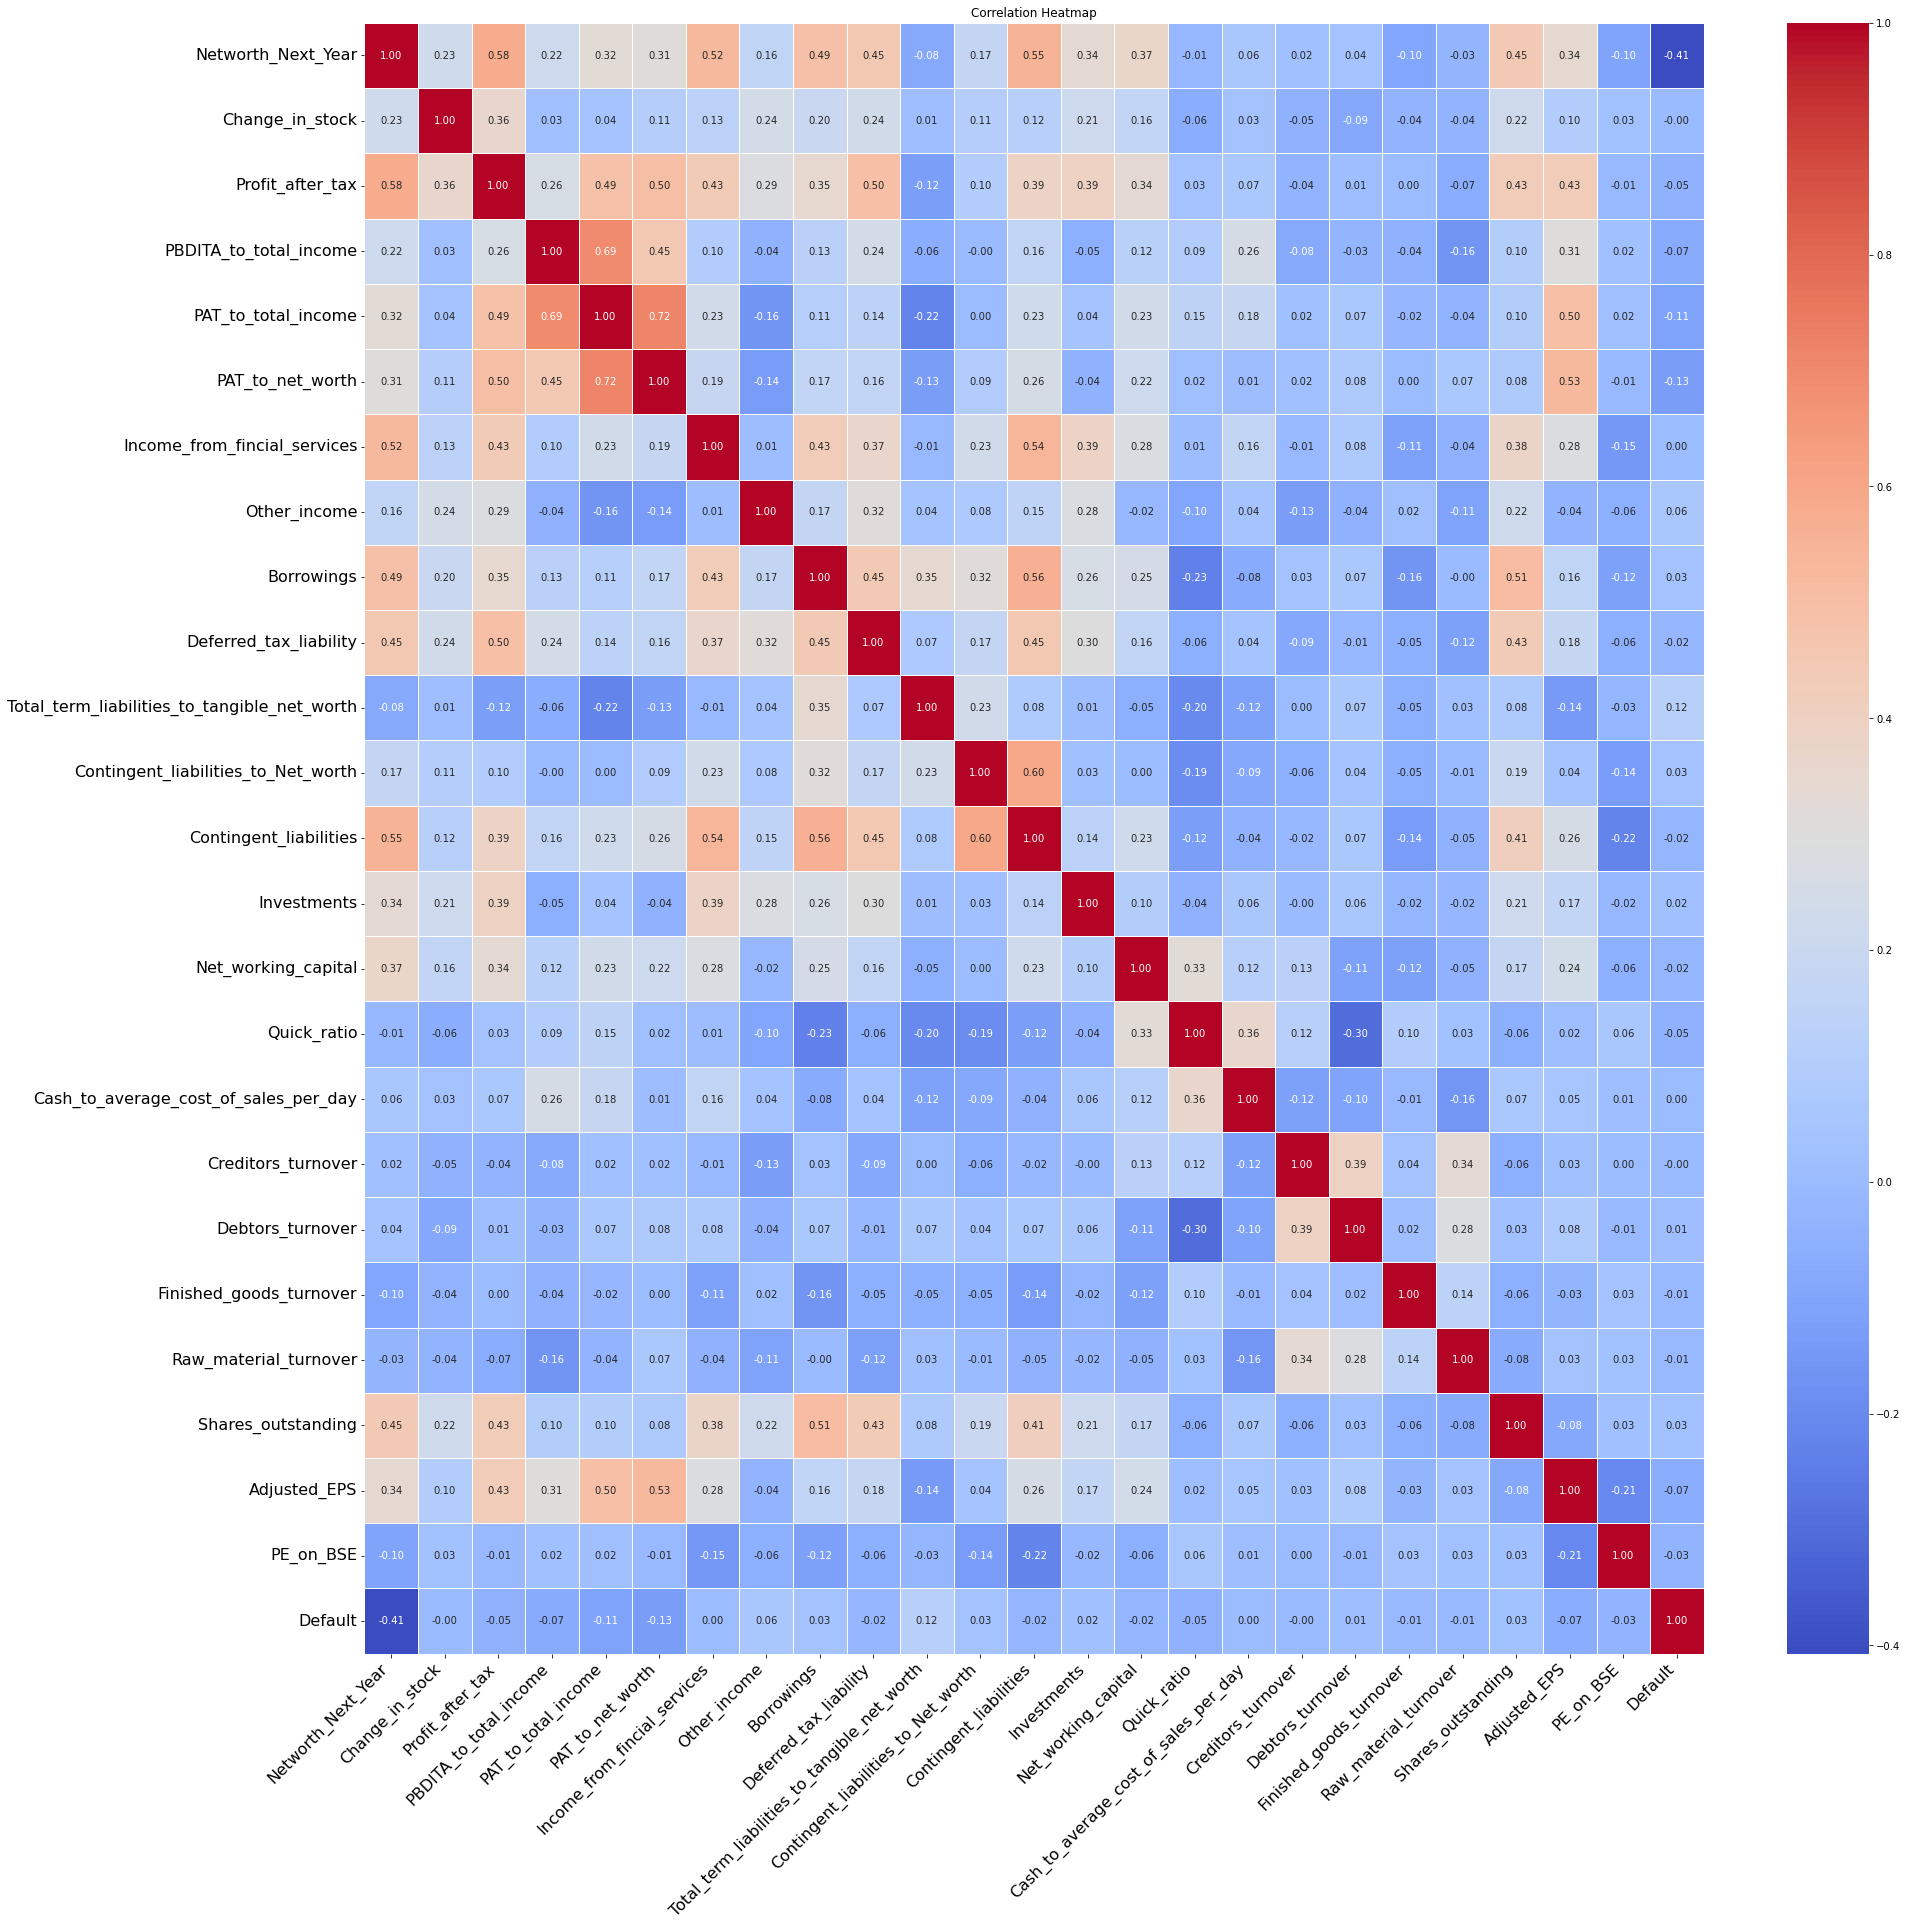

In [161]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.title('Correlation Heatmap')
plt.show()

In [162]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [163]:
df.columns

Index(['Networth_Next_Year', 'Total_assets', 'Net_worth', 'Total_income',
       'Change_in_stock', 'Total_expenses', 'Profit_after_tax', 'PBDITA',
       'PBT', 'Cash_profit', 'PBDITA_to_total_income', 'PBT_to_total_income',
       'PAT_to_total_income', 'Cash_profit_to_total_income',
       'PAT_to_net_worth', 'Sales', 'Income_from_fincial_services',
       'Other_income', 'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOLtoTNW', 'Total_term_liabilities_to_tangible_net_worth',
       'Contingent_liabilities_to_Net_worth', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio', 'Current_ratio',
       'Debt_to_equity_ratio', 'Cash_to_current_liabilities',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'F

In [164]:
X = df.drop('Default', axis=1)
y = df['Default']

In [165]:
logreg = LogisticRegression()


In [166]:
rfe = RFE(estimator=logreg, n_features_to_select=10)


In [173]:
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [175]:
selected_features = X_train.columns[rfe.support_]


In [179]:
feature_ranking = pd.DataFrame({'Feature': X_train.columns, 'Rank': rfe.ranking_})


In [177]:
feature_ranking

Feature  Rank
0                             Networth_Next_Year     1
1                                Change_in_stock     1
2                               Profit_after_tax    10
3                         PBDITA_to_total_income     2
4                            PAT_to_total_income     4
5                               PAT_to_net_worth     1
6                   Income_from_fincial_services    11
7                                   Other_income     1
8                                     Borrowings    12
9                         Deferred_tax_liability     3
10  Total_term_liabilities_to_tangible_net_worth     1
11           Contingent_liabilities_to_Net_worth     1
12                        Contingent_liabilities     8
13                                   Investments    14
14                           Net_working_capital     5
15                                   Quick_ratio     1
16         Cash_to_average_cost_of_sales_per_day     6
17                            Creditors_turnover     9
18                              Debtors_turnover     1
19                       Finished_goods_turnover     7
20                         Raw_material_turnover     1
21                            Shares_outstanding    15
22                                  Adjusted_EPS     1
23                                     PE_on_BSE    13

In [180]:
feature_ranking_sorted = feature_ranking.sort_values('Rank', ascending=True)

In [181]:
feature_ranking_sorted

Feature  Rank
0                             Networth_Next_Year     1
20                         Raw_material_turnover     1
18                              Debtors_turnover     1
15                                   Quick_ratio     1
22                                  Adjusted_EPS     1
10  Total_term_liabilities_to_tangible_net_worth     1
7                                   Other_income     1
11           Contingent_liabilities_to_Net_worth     1
5                               PAT_to_net_worth     1
1                                Change_in_stock     1
3                         PBDITA_to_total_income     2
9                         Deferred_tax_liability     3
4                            PAT_to_total_income     4
14                           Net_working_capital     5
16         Cash_to_average_cost_of_sales_per_day     6
19                       Finished_goods_turnover     7
12                        Contingent_liabilities     8
17                            Creditors_turnover     9
2                               Profit_after_tax    10
6                   Income_from_fincial_services    11
8                                     Borrowings    12
23                                     PE_on_BSE    13
13                                   Investments    14
21                            Shares_outstanding    15

In [182]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2979 entries, 3752 to 1414
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Networth_Next_Year                            2979 non-null   float64
 1   Change_in_stock                               2979 non-null   float64
 2   Profit_after_tax                              2979 non-null   float64
 3   PBDITA_to_total_income                        2979 non-null   float64
 4   PAT_to_total_income                           2979 non-null   float64
 5   PAT_to_net_worth                              2979 non-null   float64
 6   Income_from_fincial_services                  2979 non-null   float64
 7   Other_income                                  2979 non-null   float64
 8   Borrowings                                    2979 non-null   float64
 9   Deferred_tax_liability                        2979 non-null 

In [184]:
y_train

3752    0.0
1066    0.0
3608    1.0
2682    0.0
1775    0.0
       ... 
3916    0.0
1283    0.0
3714    0.0
3325    0.0
1414    0.0
Name: Default, Length: 2979, dtype: float64

In [185]:
df_train.columns

Index(['Networth_Next_Year', 'Change_in_stock', 'Profit_after_tax',
       'PBDITA_to_total_income', 'PAT_to_total_income', 'PAT_to_net_worth',
       'Income_from_fincial_services', 'Other_income', 'Borrowings',
       'Deferred_tax_liability',
       'Total_term_liabilities_to_tangible_net_worth',
       'Contingent_liabilities_to_Net_worth', 'Contingent_liabilities',
       'Investments', 'Net_working_capital', 'Quick_ratio',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', 'Raw_material_turnover',
       'Shares_outstanding', 'Adjusted_EPS', 'PE_on_BSE', 'Default'],
      dtype='object')

In [187]:
model_2 = SM.logit(formula = 'Default ~ Networth_Next_Year + Change_in_stock + Profit_after_tax + PBDITA_to_total_income + PAT_to_total_income + PAT_to_net_worth + Income_from_fincial_services + Other_income + Borrowings + Deferred_tax_liability + Total_term_liabilities_to_tangible_net_worth + Contingent_liabilities_to_Net_worth + Contingent_liabilities + Investments + Net_working_capital + Quick_ratio + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + Raw_material_turnover + Shares_outstanding + Adjusted_EPS + PE_on_BSE', data=df_train).fit(maxiter=1000)

         Current function value: inf
         Iterations: 1000


LinAlgError: Singular matrix

In [189]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [191]:
print("Coefficients:", model_lr.coef_)
print("Intercept:", model_lr.intercept_)

Coefficients: [[-5.76472916e-02 -6.63970552e-04 -2.76532883e-03 -1.55539215e-03
  -5.25733202e-04 -1.92415731e-03  1.63349823e-04 -8.34936950e-05
   3.00188471e-03 -1.45880062e-03 -3.91585445e-05 -1.47649618e-03
   2.61177447e-03 -5.47970012e-04 -3.50450072e-03 -1.17626946e-04
  -1.97720889e-03 -1.29399741e-03 -1.19629112e-03 -6.25134045e-03
  -1.31117515e-03  1.19869768e-07 -7.57789044e-04 -4.62302444e-03]]
Intercept: [-0.00012564]


In [192]:
X_train.columns

Index(['Networth_Next_Year', 'Change_in_stock', 'Profit_after_tax',
       'PBDITA_to_total_income', 'PAT_to_total_income', 'PAT_to_net_worth',
       'Income_from_fincial_services', 'Other_income', 'Borrowings',
       'Deferred_tax_liability',
       'Total_term_liabilities_to_tangible_net_worth',
       'Contingent_liabilities_to_Net_worth', 'Contingent_liabilities',
       'Investments', 'Net_working_capital', 'Quick_ratio',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', 'Raw_material_turnover',
       'Shares_outstanding', 'Adjusted_EPS', 'PE_on_BSE'],
      dtype='object')

In [194]:
equation = "Default = "
for i, var in enumerate(X_train.columns):
    equation += f"({model_lr.coef_[i]} * {var}) + "
equation += str(model_lr.intercept_)

print(equation)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [195]:
Equation = "AgentBonus ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(model_lr.coef_[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            model_lr.coef_[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print(model_lr.coef_[i], "*(", X_train.columns[i], ")")

AgentBonus = [-5.76472916e-02 -6.63970552e-04 -2.76532883e-03 -1.55539215e-03
 -5.25733202e-04 -1.92415731e-03  1.63349823e-04 -8.34936950e-05
  3.00188471e-03 -1.45880062e-03 -3.91585445e-05 -1.47649618e-03
  2.61177447e-03 -5.47970012e-04 -3.50450072e-03 -1.17626946e-04
 -1.97720889e-03 -1.29399741e-03 -1.19629112e-03 -6.25134045e-03
 -1.31117515e-03  1.19869768e-07 -7.57789044e-04 -4.62302444e-03] + 

IndexError: index 1 is out of bounds for axis 0 with size 1

In [200]:
variables = ['Networth_Next_Year', 'Change_in_stock', 'Profit_after_tax',
             'PBDITA_to_total_income', 'PAT_to_total_income', 'PAT_to_net_worth',
             'Income_from_fincial_services', 'Other_income', 'Borrowings',
             'Deferred_tax_liability', 'Total_term_liabilities_to_tangible_net_worth',
             'Contingent_liabilities_to_Net_worth', 'Contingent_liabilities',
             'Investments', 'Net_working_capital', 'Quick_ratio',
             'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
             'Debtors_turnover', 'Finished_goods_turnover', 'Raw_material_turnover',
             'Shares_outstanding', 'Adjusted_EPS', 'PE_on_BSE']

coefficients = [-5.76472916e-02, -6.63970552e-04, -2.76532883e-03,
                -1.55539215e-03, -5.25733202e-04, -1.92415731e-03,
                1.63349823e-04, -8.34936950e-05, 3.00188471e-03,
                -1.45880062e-03, -3.91585445e-05, -1.47649618e-03,
                2.61177447e-03, -5.47970012e-04, -3.50450072e-03,
                -1.17626946e-04, -1.97720889e-03, -1.29399741e-03,
                -1.19629112e-03, -6.25134045e-03, -1.31117515e-03,
                1.19869768e-07, -7.57789044e-04, -4.62302444e-03]

intercept = -0.00012564

# Create the logistic regression equation
equation = "Default = "
for i, var in enumerate(variables):
    equation += f"({coefficients[i]} * {var}) + "
equation += f"({str(intercept)})"

# Print the equation
print(equation)


Default = (-0.0576472916 * Networth_Next_Year) + (-0.000663970552 * Change_in_stock) + (-0.00276532883 * Profit_after_tax) + (-0.00155539215 * PBDITA_to_total_income) + (-0.000525733202 * PAT_to_total_income) + (-0.00192415731 * PAT_to_net_worth) + (0.000163349823 * Income_from_fincial_services) + (-8.3493695e-05 * Other_income) + (0.00300188471 * Borrowings) + (-0.00145880062 * Deferred_tax_liability) + (-3.91585445e-05 * Total_term_liabilities_to_tangible_net_worth) + (-0.00147649618 * Contingent_liabilities_to_Net_worth) + (0.00261177447 * Contingent_liabilities) + (-0.000547970012 * Investments) + (-0.00350450072 * Net_working_capital) + (-0.000117626946 * Quick_ratio) + (-0.00197720889 * Cash_to_average_cost_of_sales_per_day) + (-0.00129399741 * Creditors_turnover) + (-0.00119629112 * Debtors_turnover) + (-0.00625134045 * Finished_goods_turnover) + (-0.00131117515 * Raw_material_turnover) + (1.19869768e-07 * Shares_outstanding) + (-0.000757789044 * Adjusted_EPS) + (-0.00462302444 

In [201]:
model_2 = SM.logit(formula = 'Default ~ Networth_Next_Year + Change_in_stock + Profit_after_tax + PBDITA_to_total_income + PAT_to_total_income + PAT_to_net_worth + Income_from_fincial_services + Other_income + Borrowings + Deferred_tax_liability + Total_term_liabilities_to_tangible_net_worth + Contingent_liabilities_to_Net_worth + Contingent_liabilities + Investments + Net_working_capital + Quick_ratio + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + Raw_material_turnover + Shares_outstanding + Adjusted_EPS + PE_on_BSE', data=df_train).fit(maxiter=1000)

         Current function value: inf
         Iterations: 1000


LinAlgError: Singular matrix

In [208]:
X_train.columns

Index(['Networth_Next_Year', 'Change_in_stock', 'Profit_after_tax',
       'PBDITA_to_total_income', 'PAT_to_total_income', 'PAT_to_net_worth',
       'Income_from_fincial_services', 'Other_income', 'Borrowings',
       'Deferred_tax_liability',
       'Total_term_liabilities_to_tangible_net_worth',
       'Contingent_liabilities_to_Net_worth', 'Contingent_liabilities',
       'Investments', 'Net_working_capital', 'Quick_ratio',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', 'Raw_material_turnover',
       'Shares_outstanding', 'Adjusted_EPS', 'PE_on_BSE'],
      dtype='object')

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2'))

model.fit(X_train, y_train)

coefficients = model.named_steps['logisticregression'].coef_
intercept = model.named_steps['logisticregression'].intercept_


In [210]:
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-1.42770599e+01 -6.08585965e-02  3.15745545e-01  9.36397929e-02
   3.46181203e-02 -1.40299385e-01  2.58651956e-01  5.56892796e-03
   5.35213744e-01 -8.40506326e-03 -8.09861627e-02 -2.50811104e-02
   4.65853031e-01  2.08096016e-01  7.90440179e-01 -1.48238772e-01
   3.09217375e-02  9.98279035e-02  2.43619912e-02 -5.54997475e-02
   9.36056698e-02  1.65712344e-01  1.82521158e-01 -1.45925359e-01]]
Intercept: [-9.27670117]


In [211]:
variables = ['Networth_Next_Year', 'Change_in_stock', 'Profit_after_tax',
             'PBDITA_to_total_income', 'PAT_to_total_income', 'PAT_to_net_worth',
             'Income_from_fincial_services', 'Other_income', 'Borrowings',
             'Deferred_tax_liability', 'Total_term_liabilities_to_tangible_net_worth',
             'Contingent_liabilities_to_Net_worth', 'Contingent_liabilities',
             'Investments', 'Net_working_capital', 'Quick_ratio',
             'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
             'Debtors_turnover', 'Finished_goods_turnover', 'Raw_material_turnover',
             'Shares_outstanding', 'Adjusted_EPS', 'PE_on_BSE']

coefficients = [-1.42770599e+01, -6.08585965e-02,  3.15745545e-01,  9.36397929e-02,
   3.46181203e-02, -1.40299385e-01,  2.58651956e-01,  5.56892796e-03,
   5.35213744e-01, -8.40506326e-03, -8.09861627e-02, -2.50811104e-02,
   4.65853031e-01,  2.08096016e-01,  7.90440179e-01, -1.48238772e-01,
   3.09217375e-02,  9.98279035e-02,  2.43619912e-02, -5.54997475e-02,
   9.36056698e-02,  1.65712344e-01,  1.82521158e-01, -1.45925359e-01]

intercept = -9.27670117
equation = "Default = "
for i, var in enumerate(variables):
    equation += f"({coefficients[i]} * {var}) + "
equation += f"({str(intercept)})"

print(equation)


Default = (-14.2770599 * Networth_Next_Year) + (-0.0608585965 * Change_in_stock) + (0.315745545 * Profit_after_tax) + (0.0936397929 * PBDITA_to_total_income) + (0.0346181203 * PAT_to_total_income) + (-0.140299385 * PAT_to_net_worth) + (0.258651956 * Income_from_fincial_services) + (0.00556892796 * Other_income) + (0.535213744 * Borrowings) + (-0.00840506326 * Deferred_tax_liability) + (-0.0809861627 * Total_term_liabilities_to_tangible_net_worth) + (-0.0250811104 * Contingent_liabilities_to_Net_worth) + (0.465853031 * Contingent_liabilities) + (0.208096016 * Investments) + (0.790440179 * Net_working_capital) + (-0.148238772 * Quick_ratio) + (0.0309217375 * Cash_to_average_cost_of_sales_per_day) + (0.0998279035 * Creditors_turnover) + (0.0243619912 * Debtors_turnover) + (-0.0554997475 * Finished_goods_turnover) + (0.0936056698 * Raw_material_turnover) + (0.165712344 * Shares_outstanding) + (0.182521158 * Adjusted_EPS) + (-0.145925359 * PE_on_BSE) + (-9.27670117)


In [213]:
y_prob_pred_train = model.predict(X_train)

In [214]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [215]:
from sklearn import metrics

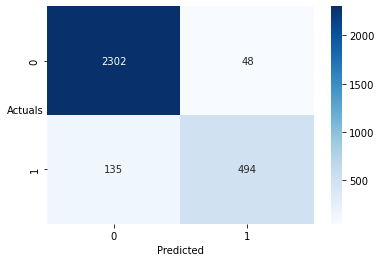

In [236]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [227]:
precision = precision_score(y_train, y_class_pred)
print("Precision:", precision)

Precision: 0.9114391143911439


In [226]:
recall = recall_score(y_train, y_class_pred)
print("Recall:", recall)

Recall: 0.7853736089030207


In [229]:
accuracy = accuracy_score(y_train, y_class_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9385699899295066


In [230]:
f1 = f1_score(y_train, y_class_pred)
print("F1 Score:", f1)

F1 Score: 0.8437233134073442


In [231]:
roc_auc = roc_auc_score(y_train, y_class_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8824740384940636


In [234]:
y_prob_pred_test = model.predict(X_test)

In [235]:
y_class_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

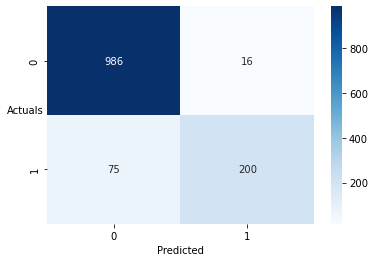

In [237]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [238]:
precision = precision_score(y_test, y_class_pred_test)
print("Precision:", precision)
recall = recall_score(y_test, y_class_pred_test)
print("Recall:", recall)
accuracy = accuracy_score(y_test, y_class_pred_test)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_class_pred_test)
print("F1 Score:", f1)
roc_auc = roc_auc_score(y_test, y_class_pred_test)
print("ROC AUC Score:", roc_auc)

Precision: 0.9259259259259259
Recall: 0.7272727272727273
Accuracy: 0.9287392325763508
F1 Score: 0.814663951120163
ROC AUC Score: 0.8556523317002359


In [239]:
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()

scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.77852349 0.90100671 0.7885906  0.77852349 0.77983193]
Mean accuracy: 0.8052952456150244


In [242]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

logreg = LogisticRegression()


param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
print("Classification Report of training set:")
print(classification_report(y_train, y_pred_train))

y_pred_test = best_model.predict(X_test)
print("Classification Report of test set:")
print(classification_report(y_test, y_pred_test))

Best hyperparameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report of training set:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2350
         1.0       0.97      1.00      0.98       629

    accuracy                           0.99      2979
   macro avg       0.99      0.99      0.99      2979
weighted avg       0.99      0.99      0.99      2979

Classification Report of test set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1002
         1.0       0.98      0.99      0.99       275

    accuracy                           0.99      1277
   macro avg       0.99      0.99      0.99      1277
weighted avg       0.99      0.99      0.99      1277



In [243]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [244]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [245]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 50}

In [246]:
best_grid = grid_search.best_estimator_

In [247]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [248]:
print("Classification Report of training set:")
print(metrics.classification_report(y_train, pred_train_rf))

Classification Report of training set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2350
         1.0       1.00      1.00      1.00       629

    accuracy                           1.00      2979
   macro avg       1.00      1.00      1.00      2979
weighted avg       1.00      1.00      1.00      2979



In [250]:
print("Classification Report of test set:")
print(metrics.classification_report(y_test, pred_test_rf))

Classification Report of test set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1002
         1.0       1.00      1.00      1.00       275

    accuracy                           1.00      1277
   macro avg       1.00      1.00      1.00      1277
weighted avg       1.00      1.00      1.00      1277



In [251]:
X_train.head()

Networth_Next_Year  Change_in_stock  Profit_after_tax  \
3752               424.2         1.600000              51.2   
1066                56.8        -0.500000               2.9   
3608                 0.0        -2.021056               5.3   
2682                11.3        -6.333440               1.0   
1775               821.1        30.600000              24.9   

      PBDITA_to_total_income  PAT_to_total_income  PAT_to_net_worth  \
3752                  21.180              9.03000          12.91000   
1066                  25.480              7.95000           5.22000   
3608                  33.520             15.48125          50.50625   
2682                  34.365             15.48125          10.20000   
1775                   1.620              0.59000           3.04000   

      Income_from_fincial_services  Other_income  Borrowings  \
3752                          2.10      0.600000     34.4000   
1066                          0.60    -10.965582      1.5000   
3608                        -10.55    -14.455378   -443.8125   
2682                        -10.55      2.100000   -443.8125   
1775                         17.85      1.059944   -443.8125   

      Deferred_tax_liability  ...  Net_working_capital  Quick_ratio  \
3752               57.700000  ...                75.90      0.83000   
1066                0.400000  ...                23.90      2.07375   
3608               82.415485  ...               -48.90      0.01000   
2682               61.219465  ...                -0.50      0.29000   
1775               17.300000  ...               218.95      1.21000   

      Cash_to_average_cost_of_sales_per_day  Creditors_turnover  \
3752                                12.2700                9.01   
1066                                54.9425                5.15   
3608                                 2.9400                0.42   
2682                                54.9425                1.11   
1775                                31.0300               31.60   

      Debtors_turnover  Finished_goods_turnover  Raw_material_turnover  \
3752          8.090000                17.140000                   3.20   
1066          2.740000                 4.110000                   6.33   
3608         18.000973               162.233156                   1.43   
2682          0.000000                87.399177                   0.00   
1775         33.215000                32.150000                  12.19   

      Shares_outstanding  Adjusted_EPS  PE_on_BSE  
3752           7042147.0        7.2700  15.730000  
1066           4941600.0        0.0700  11.990000  
3608            250300.0       19.0375 -21.597669  
2682           1000000.0        1.0000  21.724034  
1775            500000.0       19.0375  34.446681  

[5 rows x 24 columns]

In [252]:
X_train.shape

(2979, 24)

In [253]:
y_train.head()

3752    0.0
1066    0.0
3608    1.0
2682    0.0
1775    0.0
Name: Default, dtype: float64

In [254]:
y_train.shape

(2979,)

In [255]:
X_test.shape

(1277, 24)

In [256]:
y_test.head()

2345    0.0
3415    0.0
2737    0.0
2016    0.0
1294    0.0
Name: Default, dtype: float64

In [257]:
X_test.head()

Networth_Next_Year  Change_in_stock  Profit_after_tax  \
2345               318.5              0.4            82.600   
3415               821.1             26.3           165.725   
2737                60.5             -2.9             1.600   
2016                89.4             -4.0             5.300   
1294                80.2             14.1            -3.100   

      PBDITA_to_total_income  PAT_to_total_income  PAT_to_net_worth  \
2345                   10.21                 3.65          50.50625   
3415                   18.84                 8.71          24.31000   
2737                    1.47                 0.14           3.20000   
2016                   14.64                 6.99           6.68000   
1294                    3.21                -0.46          -3.91000   

      Income_from_fincial_services  Other_income  Borrowings  \
2345                     15.814872      4.000000       202.2   
3415                      3.700000     20.400000        86.6   
2737                      0.700000      0.100000        70.4   
2016                      1.700000     -5.786216         3.0   
1294                      3.600000      1.600000       113.4   

      Deferred_tax_liability  ...  Net_working_capital  Quick_ratio  \
2345               23.800000  ...                97.00      1.05000   
3415               49.400000  ...               218.95      1.03000   
2737                3.900000  ...                -9.10      0.27000   
2016               -2.323791  ...                47.20      2.07375   
1294               25.100000  ...               -10.30      0.57000   

      Cash_to_average_cost_of_sales_per_day  Creditors_turnover  \
2345                                 6.4300             4.65000   
3415                                23.5800             5.11000   
2737                                 7.2600            15.01000   
2016                                54.9425            10.07000   
1294                                13.0600            33.96625   

      Debtors_turnover  Finished_goods_turnover  Raw_material_turnover  \
2345             5.460               189.767592                  12.65   
3415             6.140                 7.660000                   3.42   
2737            33.215                33.330000                  26.16   
2016            14.210                 5.130000                   4.83   
1294            12.350                23.470000                  18.17   

      Shares_outstanding  Adjusted_EPS   PE_on_BSE  
2345       -8.600398e+06       -0.0300  111.254721  
3415        1.553500e+05       19.0375  -56.800832  
2737        1.212200e+06        1.4000   17.792598  
2016        3.362800e+06        1.6100    2.490000  
1294        1.990549e+06       -1.1100   16.040878  

[5 rows x 24 columns]

In [259]:
rf_classifier = RandomForestClassifier(n_estimators=100)

cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [1.         1.         1.         1.         0.99495798]
Mean accuracy: 0.9989915966386554


In [260]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
importance_scores = rf_model.feature_importances_
feature_importance = dict(zip(X_train.columns, importance_scores))
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

k = 10  
top_features = [feature for feature, _ in sorted_importance[:k]]

X_train_selected = X_train[top_features]


Networth_Next_Year: 0.8034315885402612
PAT_to_net_worth: 0.015813431730691215
Deferred_tax_liability: 0.014029536633288577
Total_term_liabilities_to_tangible_net_worth: 0.011764194966918154
Profit_after_tax: 0.011659638406907327
PBDITA_to_total_income: 0.009164900692468548
PAT_to_total_income: 0.009068961745757989
Adjusted_EPS: 0.009037611409783932
Shares_outstanding: 0.008517362965405619
Quick_ratio: 0.008498318379925983
Finished_goods_turnover: 0.008484031084948234
PE_on_BSE: 0.008194851202472993
Other_income: 0.007978302896831359
Debtors_turnover: 0.00794407656668669
Borrowings: 0.007872660402372597
Creditors_turnover: 0.007830093512062914
Change_in_stock: 0.00752646623332261
Investments: 0.0070585652353492775
Contingent_liabilities: 0.00704068598524676
Raw_material_turnover: 0.0069843251703012
Net_working_capital: 0.006711947251762869
Cash_to_average_cost_of_sales_per_day: 0.005412557543502474
Income_from_fincial_services: 0.00504573172571733
Contingent_liabilities_to_Net_worth: 0.

In [261]:
grid_search.fit(X_train_selected, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [262]:
grid_search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 25}

In [263]:
best_grid = grid_search.best_estimator_

In [264]:
pred_train_rf = best_grid.predict(X_train_selected)

In [265]:
X_test_selected = X_test[top_features]

In [266]:
pred_test_rf = best_grid.predict(X_test_selected)

In [267]:
print("Classification Report of training set:")
print(metrics.classification_report(y_train, pred_train_rf))

Classification Report of training set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2350
         1.0       1.00      1.00      1.00       629

    accuracy                           1.00      2979
   macro avg       1.00      1.00      1.00      2979
weighted avg       1.00      1.00      1.00      2979



In [268]:
print("Classification Report of test set:")
print(metrics.classification_report(y_test, pred_test_rf))

Classification Report of test set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1002
         1.0       1.00      1.00      1.00       275

    accuracy                           1.00      1277
   macro avg       1.00      1.00      1.00      1277
weighted avg       1.00      1.00      1.00      1277



In [269]:
X_train_selected.shape

(2979, 10)

In [270]:
X_test_selected.shape

(1277, 10)